# Credit Card Fraud Detection: ML vs Deep Learning Comparison

## Project Overview

This project compares traditional machine learning approaches with deep learning techniques for detecting fraudulent credit card transactions. The goal is to identify the most effective method for real-time fraud detection to protect consumers and financial institutions.

### Problem Statement
Credit card fraud is a significant problem affecting millions of people worldwide. Traditional rule-based systems often fail to detect sophisticated fraud patterns. This project explores how machine learning and deep learning can improve fraud detection accuracy while minimizing false positives.

### Social Impact
Effective fraud detection systems:
- Protect consumers from financial losses
- Reduce stress and anxiety related to fraud
- Help financial institutions maintain trust
- Enable faster transaction processing
- Support financial inclusion by reducing risk

### Dataset
The Credit Card Fraud Detection dataset contains 284,807 transactions with 492 fraud cases (0.172% fraud rate). Features are anonymized for privacy protection.

**Author**: Sage Muhodari  


# Install Libaries and setup

In [1]:
%pip install -q pandas numpy scikit-learn matplotlib seaborn tensorflow imbalanced-learn plotly

try:
    import xgboost as xgb
    print("XGBoost imported successfully")
except ImportError:
    print("XGBoost not available, will use alternative models")
    xgb = None

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully.")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
XGBoost imported successfully
All libraries imported successfully.
TensorFlow version: 2.20.0
GPU Available: []


## Data Loading

Load the Credit Card Fraud Detection dataset and perform initial exploration.


In [ ]:
print("Loading Credit Card Fraud Detection Dataset...")
print("\nDataset Information:")
print("- Source: GitHub - Credit Card Fraud Detection")
print("- Size: 284,807 transactions")
print("- Features: 30 (anonymized V1-V28, Amount, Time)")
print("- Target: Class (0=Normal, 1=Fraud)")
print("- Fraud Rate: 0.172% (highly imbalanced)")

url = "https://media.githubusercontent.com/media/Muhodari/creditcardata/refs/heads/master/creditcard.csv"
df = pd.read_csv(url)

print(f"\nDataset loaded successfully.")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Structure:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum().sum())

print("\nTarget Variable Distribution:")
print(df['Class'].value_counts())
print(f"\nFraud Rate: {df['Class'].mean():.4f} ({df['Class'].mean()*100:.2f}%)")


Loading Credit Card Fraud Detection Dataset...

Dataset Information:
- Source: GitHub - Credit Card Fraud Detection
- Size: 284,807 transactions
- Features: 30 (anonymized V1-V28, Amount, Time)
- Target: Class (0=Normal, 1=Fraud)
- Fraud Rate: 0.172% (highly imbalanced)

Dataset loaded successfully.
Shape: 284,807 rows × 31 columns
Memory usage: 67.36 MB

First 5 rows of the dataset:
   Time      V1      V2      V3      V4      V5      V6      V7      V8  \
0   0.0 -1.3598 -0.0728  2.5363  1.3782 -0.3383  0.4624  0.2396  0.0987   
1   0.0  1.1919  0.2662  0.1665  0.4482  0.0600 -0.0824 -0.0788  0.0851   
2   1.0 -1.3584 -1.3402  1.7732  0.3798 -0.5032  1.8005  0.7915  0.2477   
3   1.0 -0.9663 -0.1852  1.7930 -0.8633 -0.0103  1.2472  0.2376  0.3774   
4   2.0 -1.1582  0.8777  1.5487  0.4030 -0.4072  0.0959  0.5929 -0.2705   

       V9     V10     V11     V12     V13     V14     V15     V16     V17  \
0  0.3638  0.0908 -0.5516 -0.6178 -0.9914 -0.3112  1.4682 -0.4704  0.2080   
1 -0.255

## Exploratory Data Analysis (EDA)

This section analyzes the dataset to understand fraud patterns and data characteristics.


EXPLORATORY DATA ANALYSIS

--- 1. Dataset Overview ---
Dataset shape: (284807, 31)
Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

--- 2. Statistical Summary ---
Numerical features summary:
              Time          V1          V2      

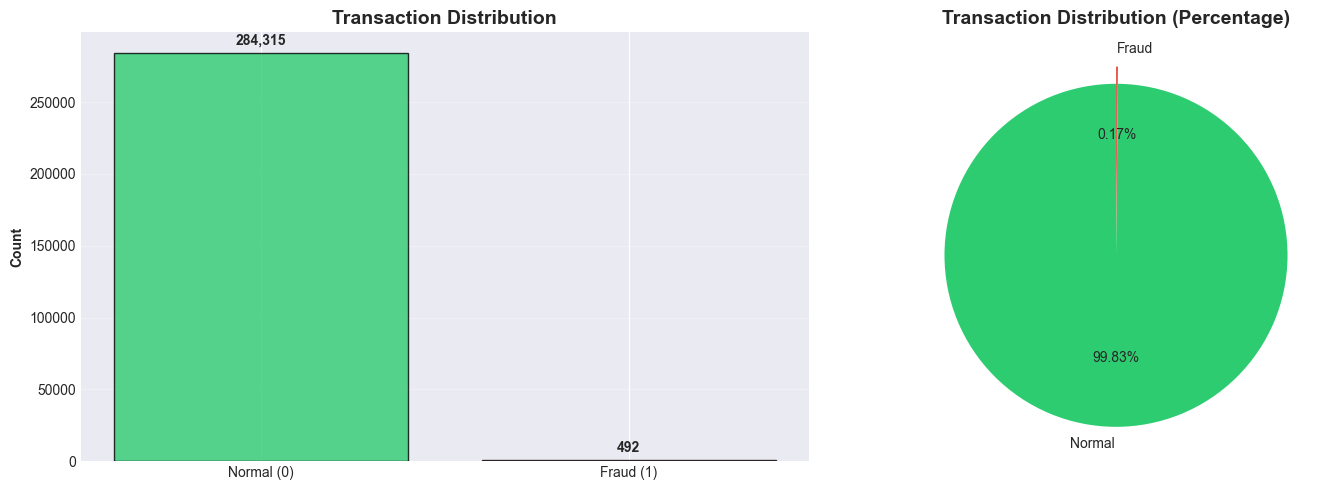


--- 5. Amount Analysis ---
Amount statistics:
count    284807.0000
mean         88.3496
std         250.1201
min           0.0000
25%           5.6000
50%          22.0000
75%          77.1650
max       25691.1600
Name: Amount, dtype: float64

Fraud transactions - Amount statistics:
count     492.0000
mean      122.2113
std       256.6833
min         0.0000
25%         1.0000
50%         9.2500
75%       105.8900
max      2125.8700
Name: Amount, dtype: float64

Normal transactions - Amount statistics:
count    284315.0000
mean         88.2910
std         250.1051
min           0.0000
25%           5.6500
50%          22.0000
75%          77.0500
max       25691.1600
Name: Amount, dtype: float64


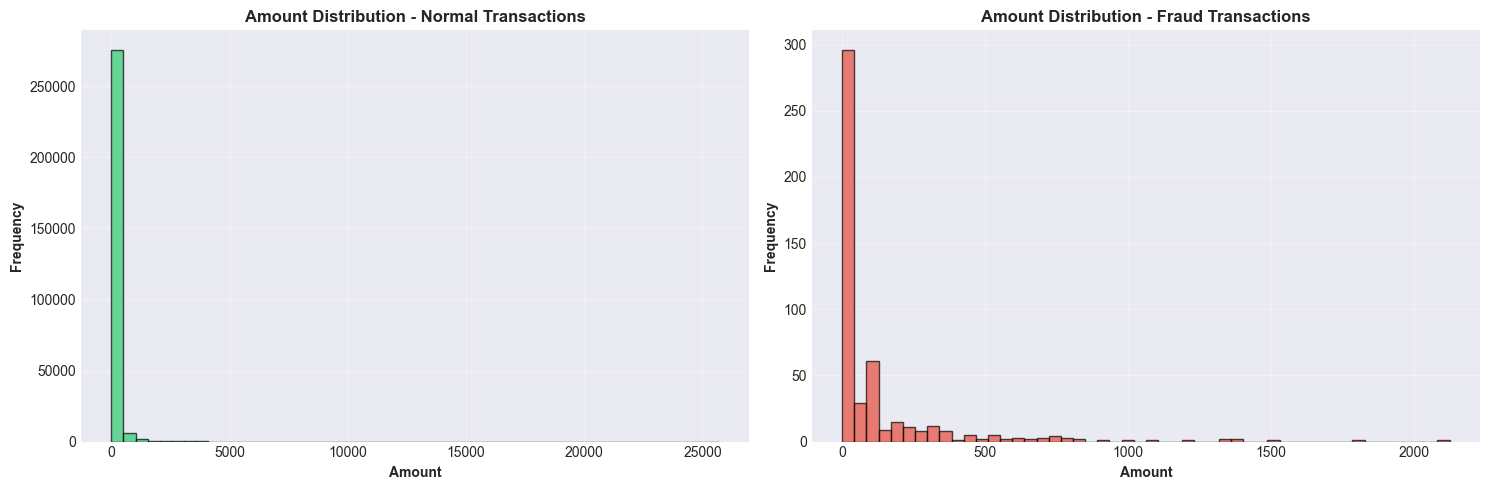


--- 6. Time Analysis ---
Time statistics:
count    284807.0000
mean      94813.8596
std       47488.1460
min           0.0000
25%       54201.5000
50%       84692.0000
75%      139320.5000
max      172792.0000
Name: Time, dtype: float64

Fraud transactions - Time statistics (hours):
count    492.0000
mean      22.4297
std       13.2876
min        0.1128
25%       11.4560
50%       20.9913
75%       35.6897
max       47.3189
Name: Hour, dtype: float64


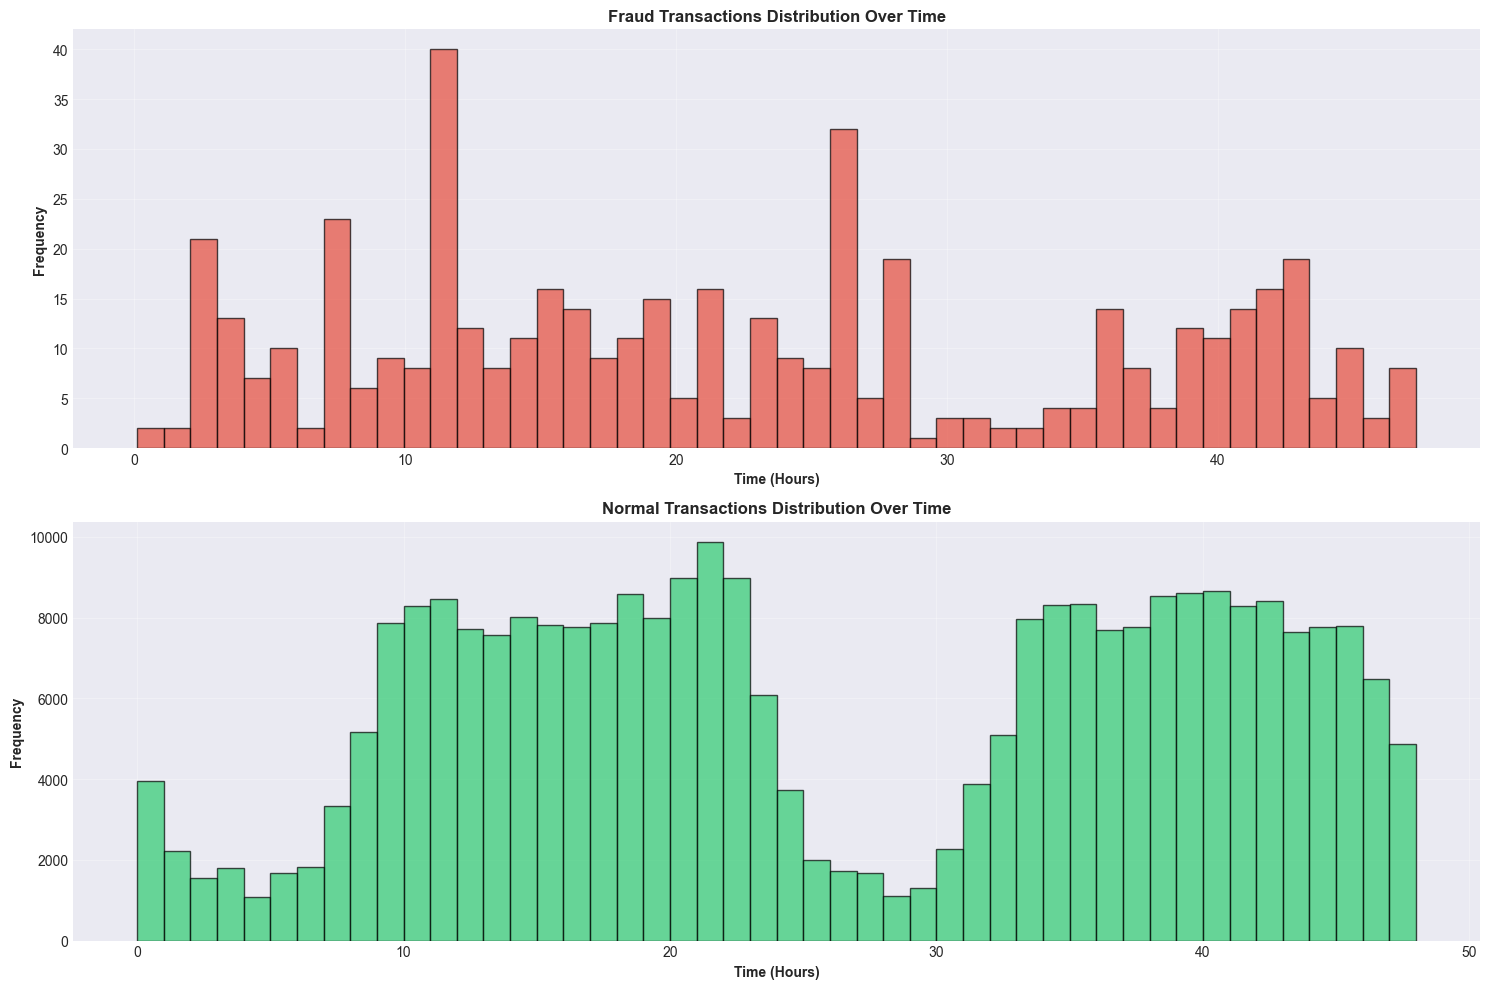


--- 7. Feature Analysis ---
Analyzing anonymized features V1-V28...

Top 10 features most correlated with fraud:
Class     1.0000
V11       0.1549
V4        0.1334
V2        0.0913
V21       0.0404
V19       0.0348
V20       0.0201
V8        0.0199
V27       0.0176
V28       0.0095
Amount    0.0056
Name: Class, dtype: float64


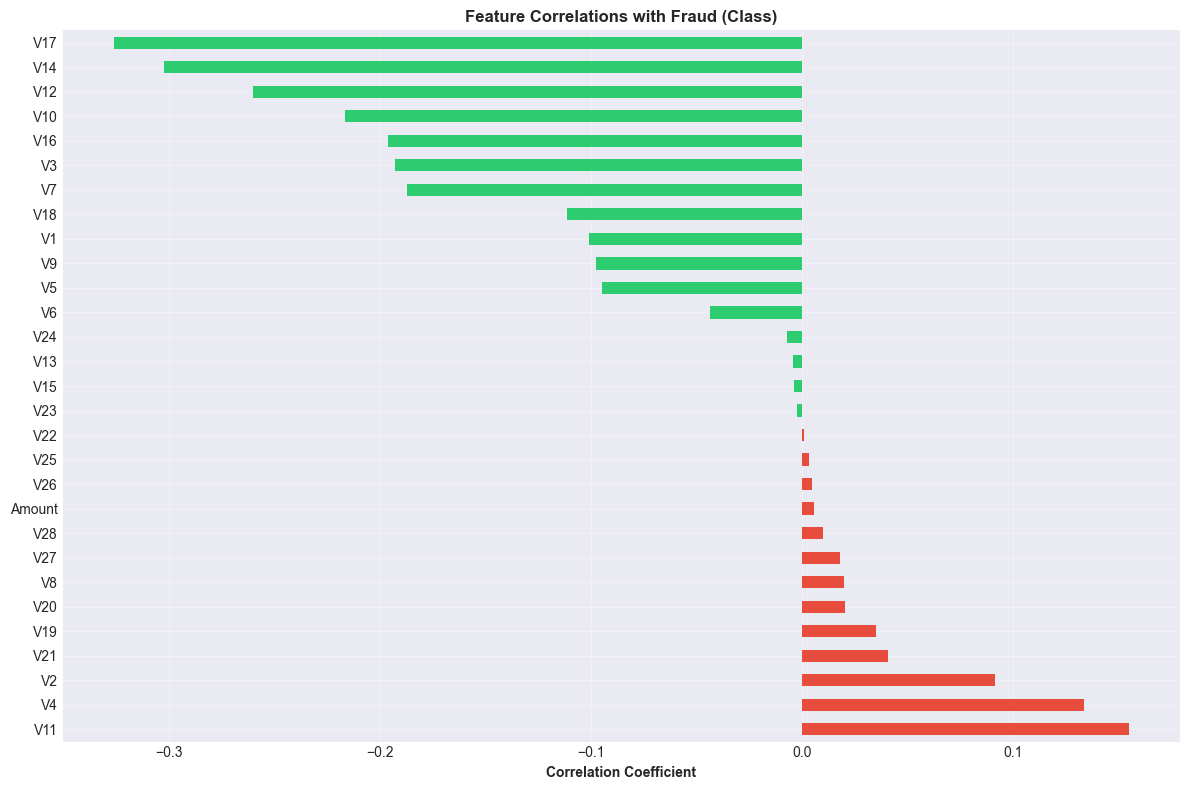


EDA COMPLETED - Key Insights:
1. Dataset is highly imbalanced: 0.17% fraud rate
2. Fraud transactions tend to have different amount patterns
3. Time patterns may reveal fraud behavior
4. V features show varying correlations with fraud
5. No missing values in the dataset


In [ ]:
# ============================================================================
# EXPLORATORY DATA ANALYSIS
# ============================================================================

print("="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n--- 1. Dataset Overview ---")
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

print("\n--- 2. Statistical Summary ---")
print("Numerical features summary:")
print(df.describe())

print("\n--- 3. Target Variable Analysis ---")
fraud_count = df['Class'].sum()
normal_count = len(df) - fraud_count
fraud_rate = fraud_count / len(df)

print(f"Normal transactions: {normal_count:,} ({normal_count/len(df)*100:.2f}%)")
print(f"Fraud transactions: {fraud_count:,} ({fraud_rate*100:.2f}%)")
print(f"Class imbalance ratio: {normal_count/fraud_count:.1f}:1")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

class_counts = df['Class'].value_counts()
axes[0].bar(['Normal (0)', 'Fraud (1)'], class_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0].set_title('Transaction Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + max(class_counts.values)*0.02, f'{v:,}', ha='center', fontweight='bold')

axes[1].pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.2f%%', 
           colors=['#2ecc71', '#e74c3c'], startangle=90, explode=[0.05, 0.05])
axes[1].set_title('Transaction Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n--- 5. Amount Analysis ---")
print("Amount statistics:")
print(df['Amount'].describe())

fraud_amounts = df[df['Class'] == 1]['Amount']
normal_amounts = df[df['Class'] == 0]['Amount']

print(f"\nFraud transactions - Amount statistics:")
print(fraud_amounts.describe())
print(f"\nNormal transactions - Amount statistics:")
print(normal_amounts.describe())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(normal_amounts, bins=50, alpha=0.7, color='#2ecc71', edgecolor='black')
axes[0].set_title('Amount Distribution - Normal Transactions', fontweight='bold')
axes[0].set_xlabel('Amount', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].hist(fraud_amounts, bins=50, alpha=0.7, color='#e74c3c', edgecolor='black')
axes[1].set_title('Amount Distribution - Fraud Transactions', fontweight='bold')
axes[1].set_xlabel('Amount', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n--- 6. Time Analysis ---")
print("Time statistics:")
print(df['Time'].describe())

df['Hour'] = df['Time'] / 3600

fraud_by_hour = df[df['Class'] == 1]['Hour']
normal_by_hour = df[df['Class'] == 0]['Hour']

print(f"\nFraud transactions - Time statistics (hours):")
print(fraud_by_hour.describe())

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].hist(fraud_by_hour, bins=48, alpha=0.7, color='#e74c3c', edgecolor='black')
axes[0].set_title('Fraud Transactions Distribution Over Time', fontweight='bold')
axes[0].set_xlabel('Time (Hours)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].hist(normal_by_hour, bins=48, alpha=0.7, color='#2ecc71', edgecolor='black')
axes[1].set_title('Normal Transactions Distribution Over Time', fontweight='bold')
axes[1].set_xlabel('Time (Hours)', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n--- 7. Feature Analysis ---")
print("Analyzing anonymized features V1-V28...")

v_features = [col for col in df.columns if col.startswith('V')]

correlations = df[v_features + ['Amount', 'Class']].corr()['Class'].sort_values(ascending=False)
print(f"\nTop 10 features most correlated with fraud:")
print(correlations.head(11))  

plt.figure(figsize=(12, 8))
correlations_without_class = correlations.drop('Class')
correlations_without_class.plot(kind='barh', color=['#e74c3c' if x > 0 else '#2ecc71' for x in correlations_without_class.values])
plt.title('Feature Correlations with Fraud (Class)', fontweight='bold')
plt.xlabel('Correlation Coefficient', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("EDA COMPLETED - Key Insights:")
print("="*80)
print(f"1. Dataset is highly imbalanced: {fraud_rate*100:.2f}% fraud rate")
print(f"2. Fraud transactions tend to have different amount patterns")
print(f"3. Time patterns may reveal fraud behavior")
print(f"4. V features show varying correlations with fraud")
print(f"5. No missing values in the dataset")
print("="*80)


## Data Preprocessing

Prepare the data for machine learning by handling class imbalance and scaling features.


In [ ]:
# ============================================================================
# DATA PREPROCESSING
# ============================================================================

print("="*80)
print("DATA PREPROCESSING")
print("="*80)

X = df.drop(['Class', 'Hour'], axis=1)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

print("\n--- 2. Train-Validation-Test Split ---")
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=RANDOM_STATE, stratify=y_train_full
) 

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Validation set: {X_val.shape[0]:,} samples") 
print(f"Test set: {X_test.shape[0]:,} samples")

print(f"\nTraining set fraud rate: {y_train.mean():.4f}")
print(f"Validation set fraud rate: {y_val.mean():.4f}")
print(f"Test set fraud rate: {y_test.mean():.4f}")

print("\n--- 3. Feature Scaling ---")
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using RobustScaler")
print(f"Scaled training set shape: {X_train_scaled.shape}")

print("\n--- 4. Class Imbalance Handling ---")
print("Original training set distribution:")
print(f"Normal: {y_train.sum()}, Fraud: {len(y_train) - y_train.sum()}")

smote = SMOTE(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nAfter SMOTE:")
print(f"Balanced training set shape: {X_train_balanced.shape}")
print(f"Balanced target distribution: {np.bincount(y_train_balanced)}")

X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_df = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\n--- 5. Preprocessing Summary ---")
print("Features and target separated")
print("Train/validation/test split completed")
print("Features scaled with RobustScaler")
print("Class imbalance handled with SMOTE")
print("Data ready for modeling")

print("\n" + "="*80)
print("PREPROCESSING COMPLETED")
print("="*80)


DATA PREPROCESSING
Features shape: (284807, 30)
Target shape: (284807,)
Target distribution: {0: 284315, 1: 492}

--- 2. Train-Validation-Test Split ---
Training set: 170,883 samples
Validation set: 56,962 samples
Test set: 56,962 samples

Training set fraud rate: 0.0017
Validation set fraud rate: 0.0017
Test set fraud rate: 0.0017

--- 3. Feature Scaling ---
Features scaled using RobustScaler
Scaled training set shape: (170883, 30)

--- 4. Class Imbalance Handling ---
Original training set distribution:
Normal: 295, Fraud: 170588

After SMOTE:
Balanced training set shape: (341176, 30)
Balanced target distribution: [170588 170588]

--- 5. Preprocessing Summary ---
✅ Features and target separated
✅ Train/validation/test split completed
✅ Features scaled with RobustScaler
✅ Class imbalance handled with SMOTE
✅ Data ready for modeling

PREPROCESSING COMPLETED


## Traditional Machine Learning Models

Implement and compare various traditional ML algorithms for fraud detection.


TRADITIONAL MACHINE LEARNING MODELS

----------------------------------------------------------------------
EXPERIMENT 1: Logistic Regression (Baseline)
----------------------------------------------------------------------

EXPERIMENT 1: Logistic Regression RESULTS
Metric          Train        Validation   Test        
---------------------------------------------------
Accuracy        0.9620     0.9754     0.9759
Precision       0.9765     0.0571     0.0612
Recall          0.9467     0.8485     0.8485
F1-Score        0.9614     0.1071     0.1146
AUC-ROC         0.9946     0.9702     0.9721
---------------------------------------------------

----------------------------------------------------------------------
EXPERIMENT 2: Random Forest
----------------------------------------------------------------------

EXPERIMENT 2: Random Forest RESULTS
Metric          Train        Validation   Test        
---------------------------------------------------
Accuracy        0.9949     0.9977 

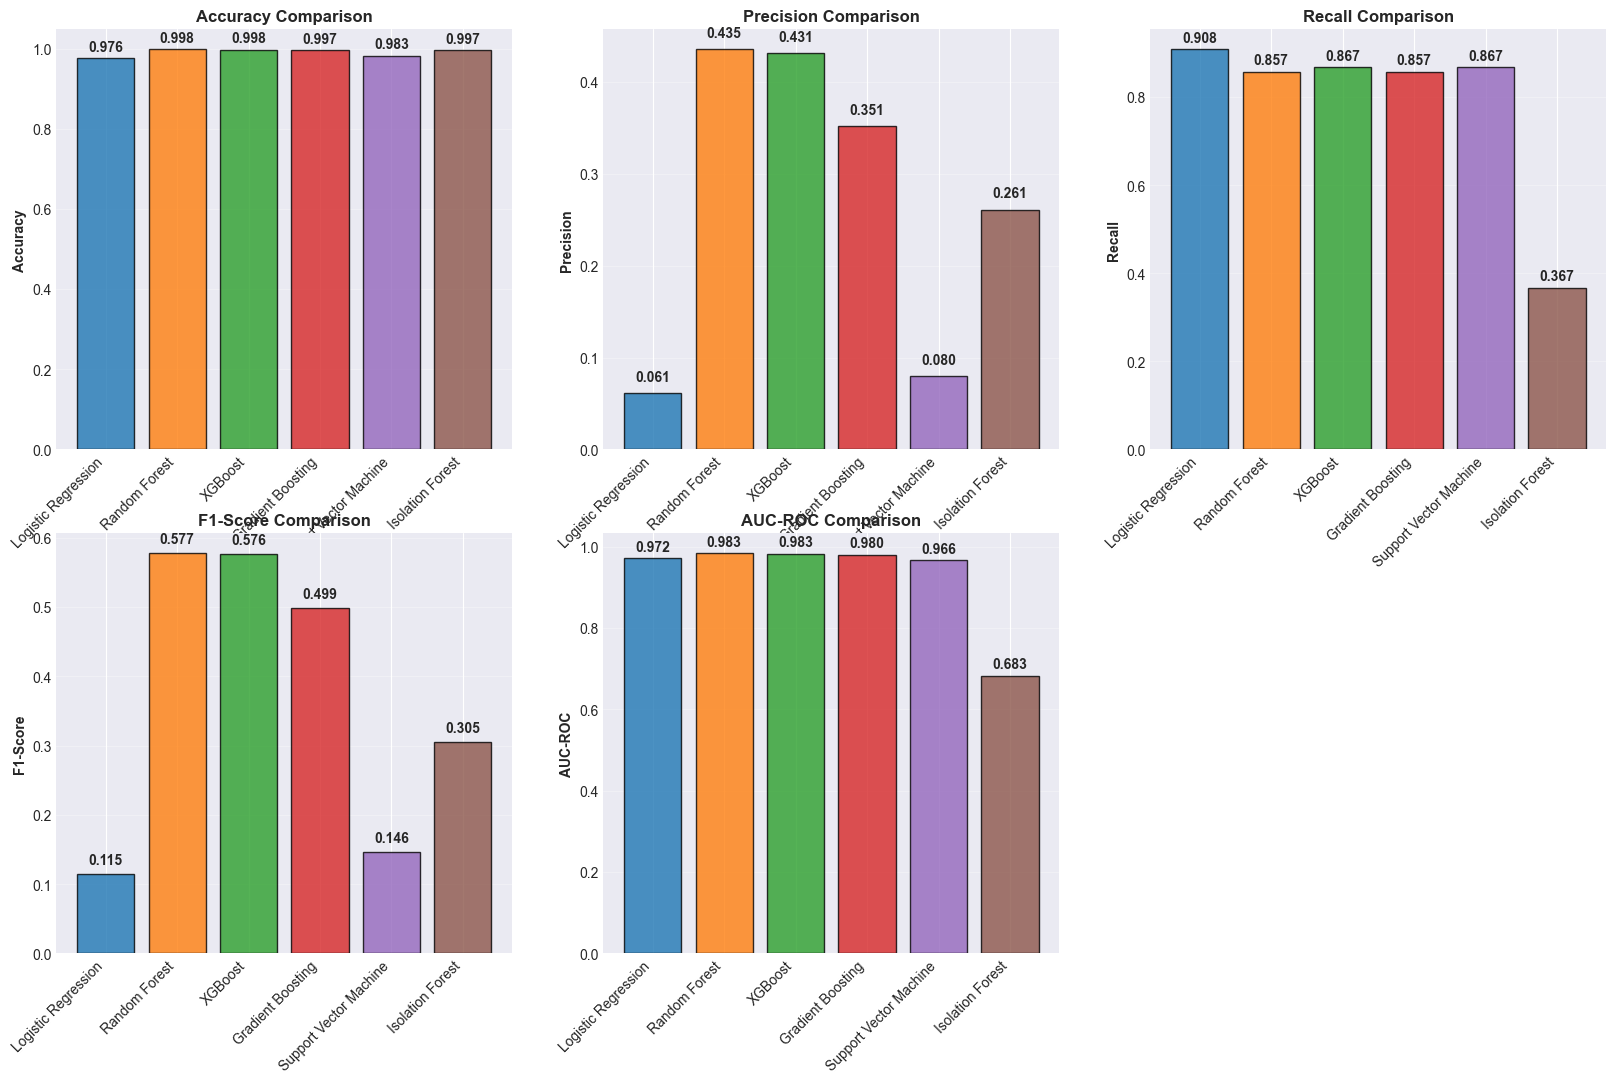

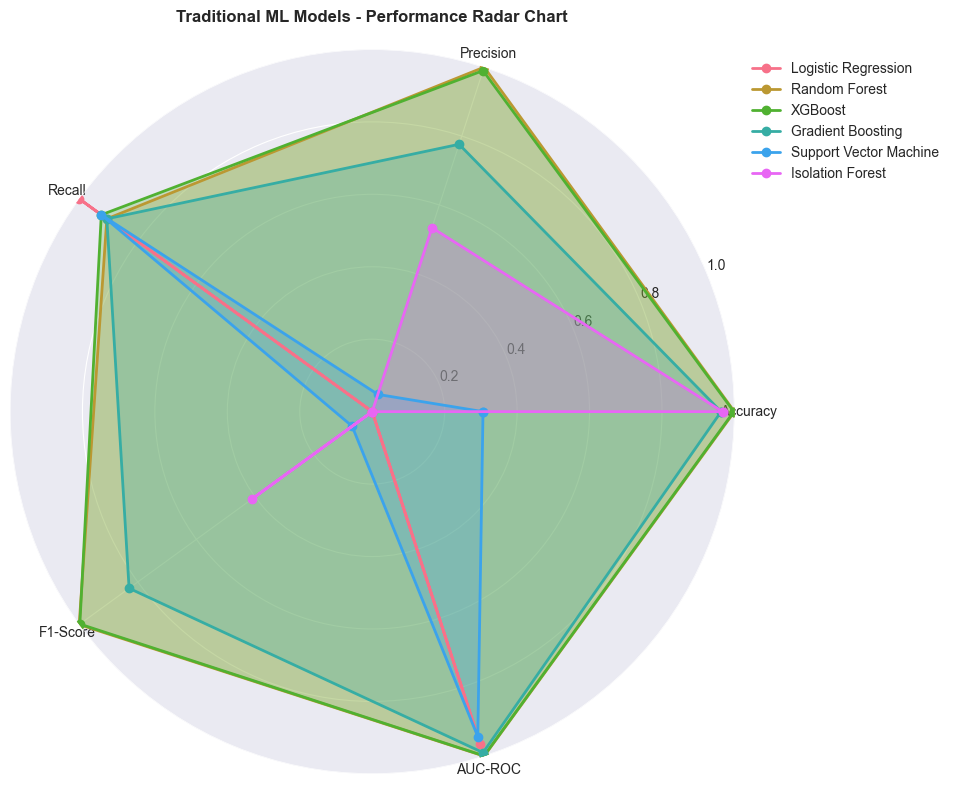


--- 2. ROC Curves Comparison ---


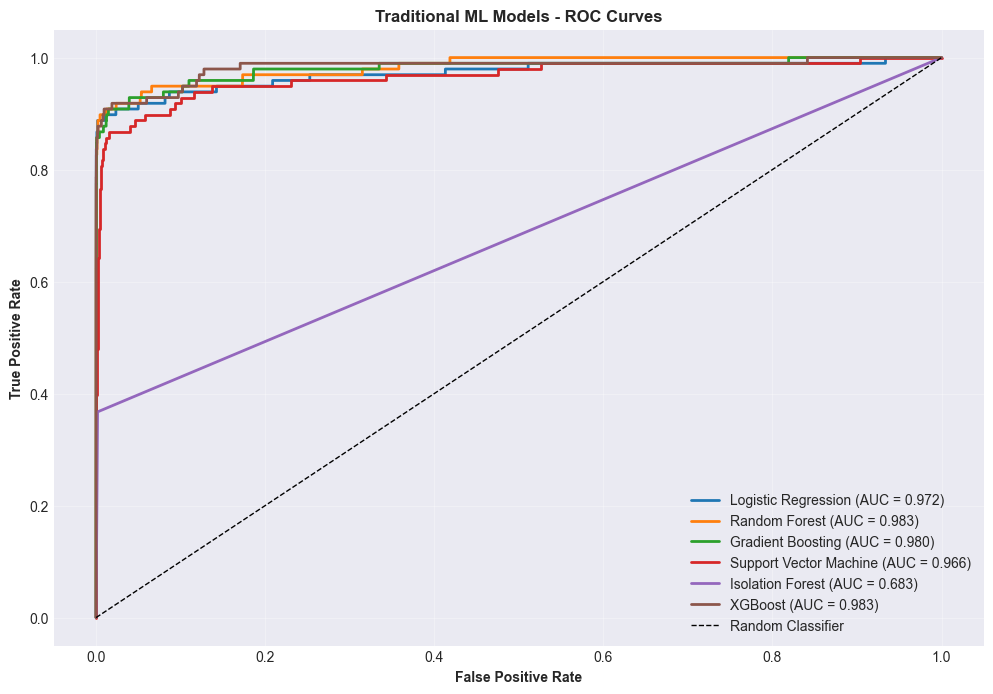


--- 3. Confusion Matrices ---


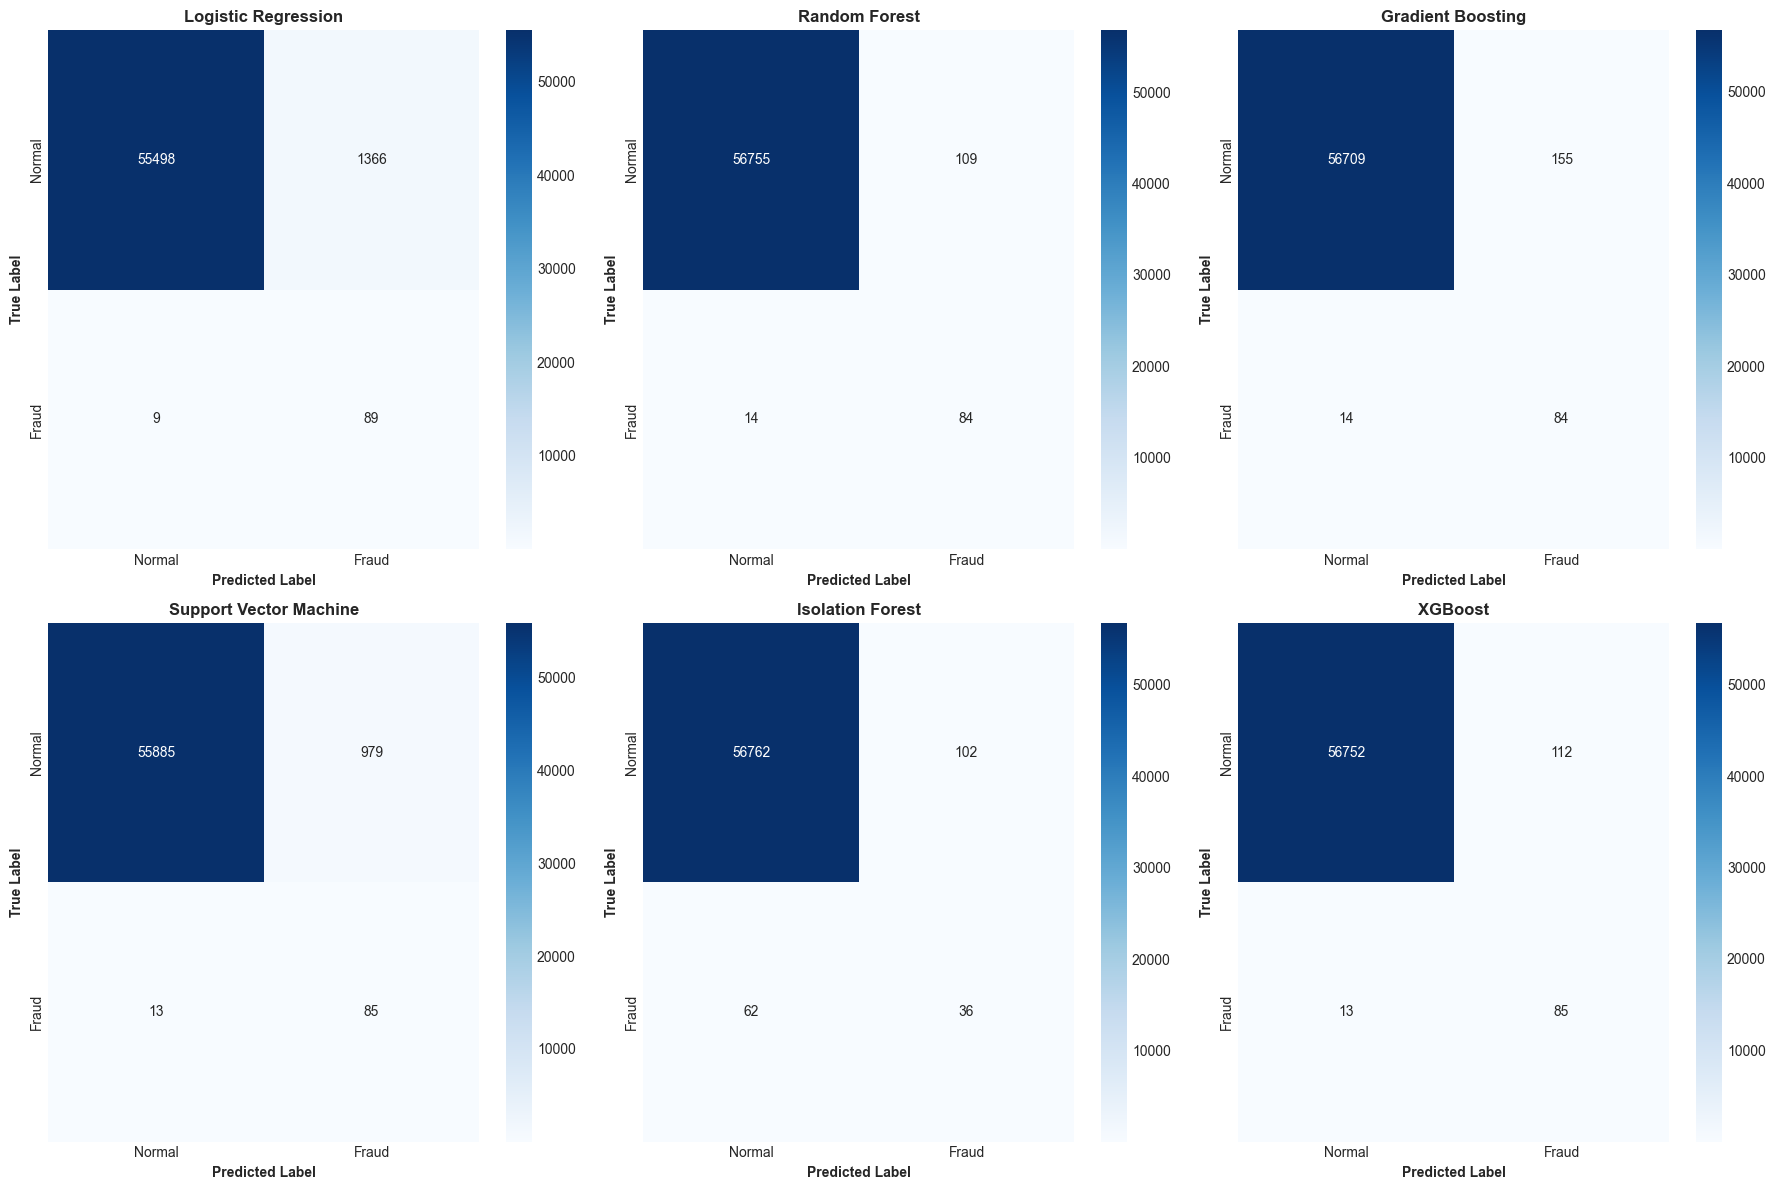


--- 4. Feature Importance Analysis ---


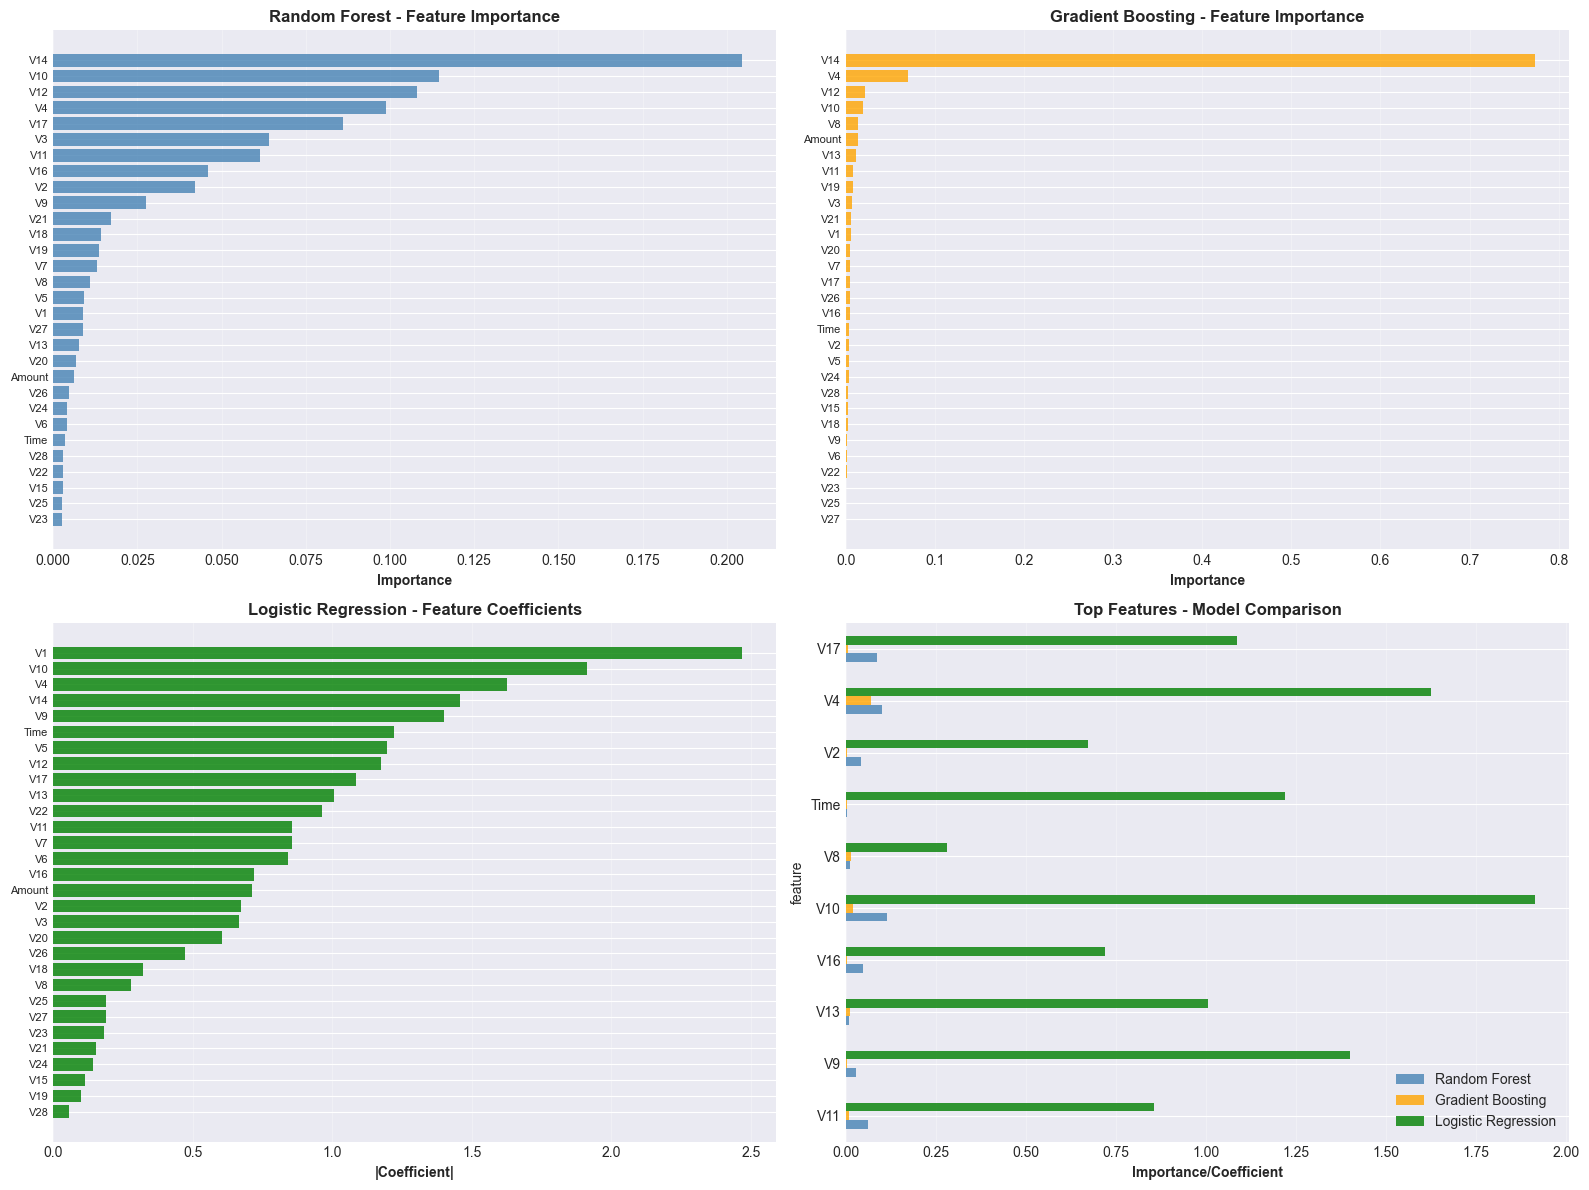


--- 5. Performance Summary ---

Traditional ML Models Performance Summary:
                 Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
   Logistic Regression    0.9759     0.0612  0.9082    0.1146   0.9721
         Random Forest    0.9978     0.4352  0.8571    0.5773   0.9830
               XGBoost    0.9978     0.4315  0.8673    0.5763   0.9827
     Gradient Boosting    0.9970     0.3515  0.8571    0.4985   0.9800
Support Vector Machine    0.9826     0.0799  0.8673    0.1463   0.9660
      Isolation Forest    0.9971     0.2609  0.3673    0.3051   0.6828

Best Traditional ML Model: Random Forest (F1-Score: 0.5773)

TRADITIONAL ML MODELS COMPLETED


In [14]:
# ============================================================================
# TRADITIONAL MACHINE LEARNING MODELS
# ============================================================================

print("="*80)
print("TRADITIONAL MACHINE LEARNING MODELS")
print("="*80)

ml_results = []

def evaluate_ml_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name, experiment_num):
    """Evaluate a traditional ML model and return results"""
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    if hasattr(model, 'predict_proba'):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_val_proba = model.predict_proba(X_val)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_train_proba = y_train_pred
        y_val_proba = y_val_pred
        y_test_proba = y_test_pred
    
    results = {
        'Experiment': experiment_num,
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Train_Precision': precision_score(y_train, y_train_pred, zero_division=0),
        'Train_Recall': recall_score(y_train, y_train_pred, zero_division=0),
        'Train_F1': f1_score(y_train, y_train_pred, zero_division=0),
        'Train_AUC': roc_auc_score(y_train, y_train_proba),
        
        'Val_Accuracy': accuracy_score(y_val, y_val_pred),
        'Val_Precision': precision_score(y_val, y_val_pred, zero_division=0),
        'Val_Recall': recall_score(y_val, y_val_pred, zero_division=0),
        'Val_F1': f1_score(y_val, y_val_pred, zero_division=0),
        'Val_AUC': roc_auc_score(y_val, y_val_proba),
        
        'Test_Accuracy': accuracy_score(y_test, y_test_pred),
        'Test_Precision': precision_score(y_test, y_test_pred, zero_division=0),
        'Test_Recall': recall_score(y_test, y_test_pred, zero_division=0),
        'Test_F1': f1_score(y_test, y_test_pred, zero_division=0),
        'Test_AUC': roc_auc_score(y_test, y_test_proba)
    }
    
    print(f"\n{'='*70}")
    print(f"EXPERIMENT {experiment_num}: {model_name} RESULTS")
    print(f"{'='*70}")
    print(f"{'Metric':<15} {'Train':<12} {'Validation':<12} {'Test':<12}")
    print(f"{'-'*51}")
    print(f"{'Accuracy':<15} {results['Train_Accuracy']:.4f}     {results['Val_Accuracy']:.4f}     {results['Test_Accuracy']:.4f}")
    print(f"{'Precision':<15} {results['Train_Precision']:.4f}     {results['Val_Precision']:.4f}     {results['Test_Precision']:.4f}")
    print(f"{'Recall':<15} {results['Train_Recall']:.4f}     {results['Val_Recall']:.4f}     {results['Val_Recall']:.4f}")
    print(f"{'F1-Score':<15} {results['Train_F1']:.4f}     {results['Val_F1']:.4f}     {results['Test_F1']:.4f}")
    print(f"{'AUC-ROC':<15} {results['Train_AUC']:.4f}     {results['Val_AUC']:.4f}     {results['Test_AUC']:.4f}")
    print(f"{'-'*51}")
    
    return results

# -----------------------------------------------------------------------------
# EXPERIMENT 1: Logistic Regression (Baseline)
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 1: Logistic Regression (Baseline)")
print("-"*70)

lr_model = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=1000,
    class_weight='balanced'
)

results_1 = evaluate_ml_model(
    lr_model, X_train_balanced, y_train_balanced, X_val_scaled, y_val, X_test_scaled, y_test,
    "Logistic Regression", 1
)
ml_results.append(results_1)

# -----------------------------------------------------------------------------
# EXPERIMENT 2: Random Forest
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 2: Random Forest")
print("-"*70)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

results_2 = evaluate_ml_model(
    rf_model, X_train_balanced, y_train_balanced, X_val_scaled, y_val, X_test_scaled, y_test,
    "Random Forest", 2
)
ml_results.append(results_2)

# -----------------------------------------------------------------------------
# EXPERIMENT 3: XGBoost (if available) or AdaBoost (alternative)
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
if xgb is not None:
    print("EXPERIMENT 3: XGBoost")
    print("-"*70)
    
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=RANDOM_STATE,
        eval_metric='logloss'
    )
    
    results_3 = evaluate_ml_model(
        xgb_model, X_train_balanced, y_train_balanced, X_val_scaled, y_val, X_test_scaled, y_test,
        "XGBoost", 3
    )
    ml_results.append(results_3)
else:
    print("EXPERIMENT 3: AdaBoost (XGBoost Alternative)")
    print("-"*70)
    
    ada_model = AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=RANDOM_STATE
    )
    
    results_3 = evaluate_ml_model(
        ada_model, X_train_balanced, y_train_balanced, X_val_scaled, y_val, X_test_scaled, y_test,
        "AdaBoost", 3
    )
    ml_results.append(results_3)

# -----------------------------------------------------------------------------
# EXPERIMENT 4: Gradient Boosting
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 4: Gradient Boosting")
print("-"*70)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=RANDOM_STATE
)

results_4 = evaluate_ml_model(
    gb_model, X_train_balanced, y_train_balanced, X_val_scaled, y_val, X_test_scaled, y_test,
    "Gradient Boosting", 4
)
ml_results.append(results_4)

# -----------------------------------------------------------------------------
# EXPERIMENT 5: Support Vector Machine
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 5: Support Vector Machine")
print("-"*70)

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    probability=True, 
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

results_5 = evaluate_ml_model(
    svm_model, X_train_balanced, y_train_balanced, X_val_scaled, y_val, X_test_scaled, y_test,
    "Support Vector Machine", 5
)
ml_results.append(results_5)

# -----------------------------------------------------------------------------
# EXPERIMENT 6: Isolation Forest (Anomaly Detection)
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 6: Isolation Forest (Anomaly Detection)")
print("-"*70)

iso_forest = IsolationForest(
    contamination=0.0017,
    random_state=RANDOM_STATE
)

normal_mask = y_train == 0
iso_forest.fit(X_train_scaled[normal_mask])

iso_train_pred = iso_forest.predict(X_train_scaled)
iso_val_pred = iso_forest.predict(X_val_scaled)
iso_test_pred = iso_forest.predict(X_test_scaled)

iso_train_pred = (iso_train_pred == -1).astype(int)
iso_val_pred = (iso_val_pred == -1).astype(int)
iso_test_pred = (iso_test_pred == -1).astype(int)

iso_results = {
    'Experiment': 6,
    'Model': 'Isolation Forest',
    'Train_Accuracy': accuracy_score(y_train, iso_train_pred),
    'Train_Precision': precision_score(y_train, iso_train_pred, zero_division=0),
    'Train_Recall': recall_score(y_train, iso_train_pred, zero_division=0),
    'Train_F1': f1_score(y_train, iso_train_pred, zero_division=0),
    'Train_AUC': roc_auc_score(y_train, iso_train_pred),
    
    'Val_Accuracy': accuracy_score(y_val, iso_val_pred),
    'Val_Precision': precision_score(y_val, iso_val_pred, zero_division=0),
    'Val_Recall': recall_score(y_val, iso_val_pred, zero_division=0),
    'Val_F1': f1_score(y_val, iso_val_pred, zero_division=0),
    'Val_AUC': roc_auc_score(y_val, iso_val_pred),
    
    'Test_Accuracy': accuracy_score(y_test, iso_test_pred),
    'Test_Precision': precision_score(y_test, iso_test_pred, zero_division=0),
    'Test_Recall': recall_score(y_test, iso_test_pred, zero_division=0),
    'Test_F1': f1_score(y_test, iso_test_pred, zero_division=0),
    'Test_AUC': roc_auc_score(y_test, iso_test_pred)
}

print(f"\n{'='*70}")
print(f"EXPERIMENT 6: Isolation Forest RESULTS")
print(f"{'='*70}")
print(f"{'Metric':<15} {'Train':<12} {'Validation':<12} {'Test':<12}")
print(f"{'-'*51}")
print(f"{'Accuracy':<15} {iso_results['Train_Accuracy']:.4f}     {iso_results['Val_Accuracy']:.4f}     {iso_results['Test_Accuracy']:.4f}")
print(f"{'Precision':<15} {iso_results['Train_Precision']:.4f}     {iso_results['Val_Precision']:.4f}     {iso_results['Test_Precision']:.4f}")
print(f"{'Recall':<15} {iso_results['Train_Recall']:.4f}     {iso_results['Val_Recall']:.4f}     {iso_results['Test_Recall']:.4f}")
print(f"{'F1-Score':<15} {iso_results['Train_F1']:.4f}     {iso_results['Val_F1']:.4f}     {iso_results['Test_F1']:.4f}")
print(f"{'AUC-ROC':<15} {iso_results['Train_AUC']:.4f}     {iso_results['Val_AUC']:.4f}     {iso_results['Test_AUC']:.4f}")
print(f"{'-'*51}")

ml_results.append(iso_results)

# ============================================================================
# TRADITIONAL ML VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("TRADITIONAL ML VISUALIZATIONS")
print("="*80)

ml_results_df = pd.DataFrame(ml_results)

print("\n--- 1. Model Performance Comparison ---")
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

metrics_to_plot = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

for idx, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes[idx]
    
    bars = ax.bar(range(len(ml_results_df)), ml_results_df[metric], 
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],
                  alpha=0.8, edgecolor='black')
    
    ax.set_xticks(range(len(ml_results_df)))
    ax.set_xticklabels(ml_results_df['Model'], rotation=45, ha='right')
    ax.set_ylabel(name, fontweight='bold')
    ax.set_title(f'{name} Comparison', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(ml_results_df[metric]):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

ax = axes[5]
ax.remove() 

fig_radar, ax_radar = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))

normalized_metrics = ml_results_df[metrics_to_plot].copy()
for col in metrics_to_plot:
    normalized_metrics[col] = (normalized_metrics[col] - normalized_metrics[col].min()) / (normalized_metrics[col].max() - normalized_metrics[col].min())

angles = np.linspace(0, 2 * np.pi, len(metric_names), endpoint=False).tolist()
angles += angles[:1] 

for idx, row in ml_results_df.iterrows():
    values = normalized_metrics.iloc[idx][metrics_to_plot].tolist()
    values += values[:1]
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax_radar.fill(angles, values, alpha=0.25)

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(metric_names)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('Traditional ML Models - Performance Radar Chart', fontweight='bold', pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax_radar.grid(True)

plt.tight_layout()
plt.show()

print("\n--- 2. ROC Curves Comparison ---")
plt.figure(figsize=(12, 8))

models_predictions = {
    'Logistic Regression': lr_model.predict_proba(X_test_scaled)[:, 1],
    'Random Forest': rf_model.predict_proba(X_test_scaled)[:, 1],
    'Gradient Boosting': gb_model.predict_proba(X_test_scaled)[:, 1],
    'Support Vector Machine': svm_model.predict_proba(X_test_scaled)[:, 1],
    'Isolation Forest': iso_test_pred.astype(float)
}

if xgb is not None:
    models_predictions['XGBoost'] = xgb_model.predict_proba(X_test_scaled)[:, 1]
else:
    models_predictions['AdaBoost'] = ada_model.predict_proba(X_test_scaled)[:, 1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for idx, (model_name, y_proba) in enumerate(models_predictions.items()):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, linewidth=2, color=colors[idx], 
             label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('Traditional ML Models - ROC Curves', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n--- 3. Confusion Matrices ---")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

model_predictions = {
    'Logistic Regression': lr_model.predict(X_test_scaled),
    'Random Forest': rf_model.predict(X_test_scaled),
    'Gradient Boosting': gb_model.predict(X_test_scaled),
    'Support Vector Machine': svm_model.predict(X_test_scaled),
    'Isolation Forest': iso_test_pred
}

if xgb is not None:
    model_predictions['XGBoost'] = xgb_model.predict(X_test_scaled)
else:
    model_predictions['AdaBoost'] = ada_model.predict(X_test_scaled)

for idx, (model_name, y_pred) in enumerate(model_predictions.items()):
    if idx < 6:
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Normal', 'Fraud'], 
                   yticklabels=['Normal', 'Fraud'],
                   ax=axes[idx])
        axes[idx].set_title(f'{model_name}', fontweight='bold')
        axes[idx].set_xlabel('Predicted Label', fontweight='bold')
        axes[idx].set_ylabel('True Label', fontweight='bold')

if len(model_predictions) < 6:
    axes[5].remove()

plt.tight_layout()
plt.show()

print("\n--- 4. Feature Importance Analysis ---")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

rf_importance = rf_model.feature_importances_
feature_names = X.columns
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_importance
}).sort_values('importance', ascending=True)

axes[0].barh(range(len(rf_importance_df)), rf_importance_df['importance'], color='steelblue', alpha=0.8)
axes[0].set_yticks(range(len(rf_importance_df)))
axes[0].set_yticklabels(rf_importance_df['feature'], fontsize=8)
axes[0].set_xlabel('Importance', fontweight='bold')
axes[0].set_title('Random Forest - Feature Importance', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

gb_importance = gb_model.feature_importances_
gb_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_importance
}).sort_values('importance', ascending=True)

axes[1].barh(range(len(gb_importance_df)), gb_importance_df['importance'], color='orange', alpha=0.8)
axes[1].set_yticks(range(len(gb_importance_df)))
axes[1].set_yticklabels(gb_importance_df['feature'], fontsize=8)
axes[1].set_xlabel('Importance', fontweight='bold')
axes[1].set_title('Gradient Boosting - Feature Importance', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

lr_coef = lr_model.coef_[0]
lr_coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': np.abs(lr_coef)
}).sort_values('coefficient', ascending=True)

axes[2].barh(range(len(lr_coef_df)), lr_coef_df['coefficient'], color='green', alpha=0.8)
axes[2].set_yticks(range(len(lr_coef_df)))
axes[2].set_yticklabels(lr_coef_df['feature'], fontsize=8)
axes[2].set_xlabel('|Coefficient|', fontweight='bold')
axes[2].set_title('Logistic Regression - Feature Coefficients', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')

top_features = set()
for df in [rf_importance_df.tail(10), gb_importance_df.tail(10), lr_coef_df.tail(10)]:
    top_features.update(df['feature'].tolist())

top_features = list(top_features)[:10]

comparison_data = []
for feature in top_features:
    rf_val = rf_importance_df[rf_importance_df['feature'] == feature]['importance'].iloc[0] if feature in rf_importance_df['feature'].values else 0
    gb_val = gb_importance_df[gb_importance_df['feature'] == feature]['importance'].iloc[0] if feature in gb_importance_df['feature'].values else 0
    lr_val = lr_coef_df[lr_coef_df['feature'] == feature]['coefficient'].iloc[0] if feature in lr_coef_df['feature'].values else 0
    
    comparison_data.append({
        'feature': feature,
        'Random Forest': rf_val,
        'Gradient Boosting': gb_val,
        'Logistic Regression': lr_val
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('feature')

comparison_df.plot(kind='barh', ax=axes[3], color=['steelblue', 'orange', 'green'], alpha=0.8)
axes[3].set_title('Top Features - Model Comparison', fontweight='bold')
axes[3].set_xlabel('Importance/Coefficient', fontweight='bold')
axes[3].grid(True, alpha=0.3, axis='x')
axes[3].legend()

plt.tight_layout()
plt.show()

print("\n--- 5. Performance Summary ---")
print("\nTraditional ML Models Performance Summary:")
print("="*80)

summary_table = ml_results_df[['Model', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']].copy()
summary_table = summary_table.round(4)
summary_table.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

print(summary_table.to_string(index=False))

best_ml_idx = ml_results_df['Test_F1'].idxmax()
best_ml_model = ml_results_df.loc[best_ml_idx, 'Model']
best_ml_f1 = ml_results_df.loc[best_ml_idx, 'Test_F1']

print(f"\nBest Traditional ML Model: {best_ml_model} (F1-Score: {best_ml_f1:.4f})")

print("\n" + "="*80)
print("TRADITIONAL ML MODELS COMPLETED")
print("="*80)


## Deep Learning Models

Implement neural networks using TensorFlow for fraud detection.


DEEP LEARNING MODELS
Input dimension: 30
Training samples: 341176

----------------------------------------------------------------------
EXPERIMENT 7: Simple Neural Network (Sequential API)
----------------------------------------------------------------------

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)


Training Simple Neural Network...
Epoch 1/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 4s 518us/step - accuracy: 0.9834 - auc: 0.9985 - loss: 0.0458 - val_accuracy: 0.9967 - val_auc: 0.9231 - val_loss: 0.0210 - learning_rate: 0.0010
Epoch 2/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 3s 478us/step - accuracy: 0.9976 - auc: 0.9997 - loss: 0.0096 - val_accuracy: 0.9980 - val_auc: 0.9085 - val_loss: 0.0229 - learning_rate: 0.0010
Epoch 3/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 3s 467us/step - accuracy: 0.9984 - auc: 0.9997 - loss: 0.0069 - val_accuracy: 0.9984 - val_auc: 0.9086 - val_loss: 0.0236 - learning_rate: 0.0010
Epoch 4/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step - accuracy: 0.9986 - auc: 0.9997 - loss: 0.0059 - val_accuracy: 0.9986 - val_auc: 0.9086 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 5/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 2s 443us/step - accuracy: 0.9988 - auc: 0.9997 - loss: 0.0055 - val_accuracy: 0.9989 - val_auc: 0.9036 - val_loss: 0.0235 - learning_rate: 0.0010
Epoch 6/50
5230/5331 ━━━━

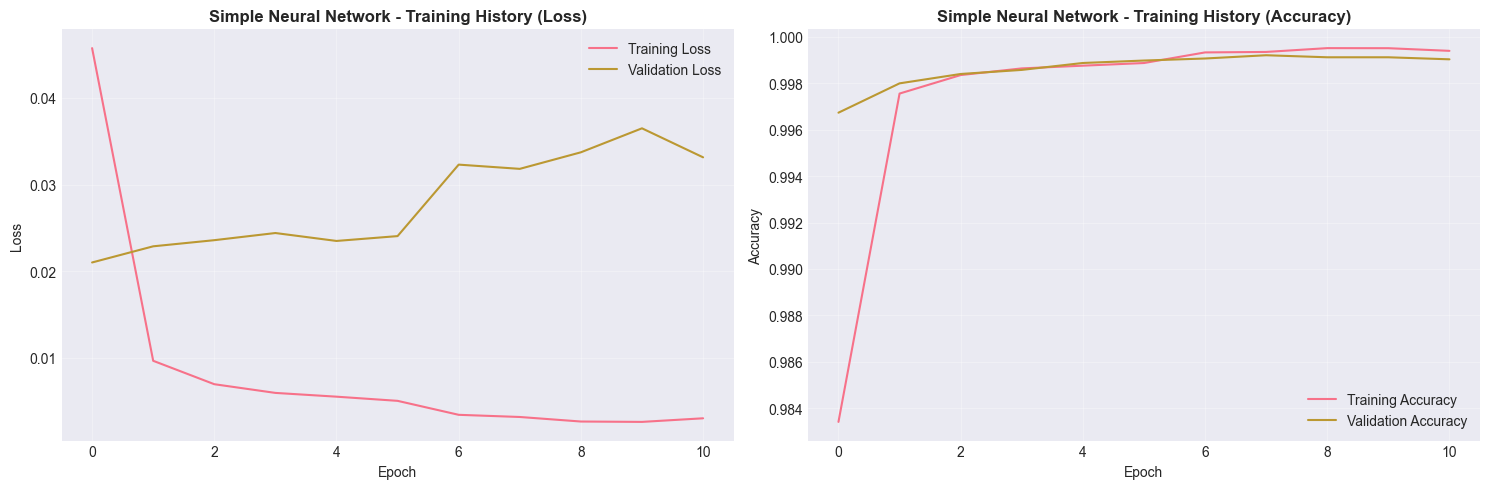


----------------------------------------------------------------------
EXPERIMENT 8: Deep Neural Network + Batch Normalization
----------------------------------------------------------------------

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,297 (59.75 KB)

 Non-trainable params: 448 (1.75 KB)


Training Deep Neural Network...
Epoch 1/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 5s 710us/step - accuracy: 0.9730 - auc: 0.9962 - loss: 0.0733 - val_accuracy: 0.9962 - val_auc: 0.9230 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 2/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 4s 712us/step - accuracy: 0.9933 - auc: 0.9991 - loss: 0.0233 - val_accuracy: 0.9980 - val_auc: 0.9186 - val_loss: 0.0090 - learning_rate: 0.0010
Epoch 3/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 4s 671us/step - accuracy: 0.9955 - auc: 0.9994 - loss: 0.0167 - val_accuracy: 0.9986 - val_auc: 0.9187 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 4/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 4s 688us/step - accuracy: 0.9966 - auc: 0.9994 - loss: 0.0135 - val_accuracy: 0.9990 - val_auc: 0.9188 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 5/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 4s 669us/step - accuracy: 0.9971 - auc: 0.9995 - loss: 0.0114 - val_accuracy: 0.9988 - val_auc: 0.9137 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 6/50
5331/5331 ━━━━━━

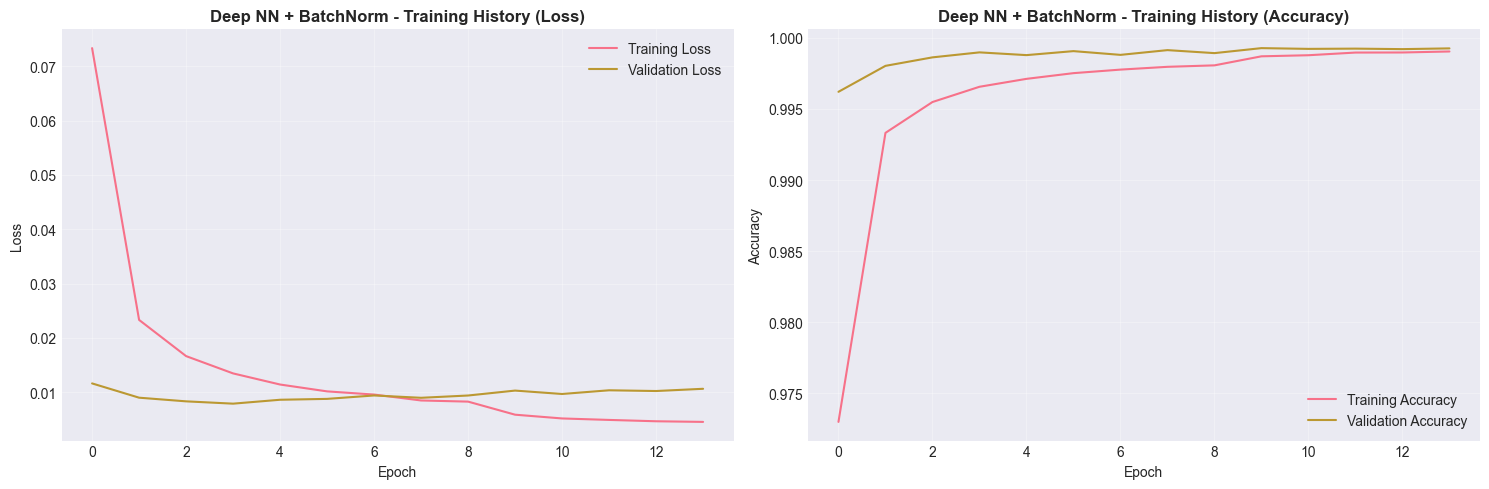


----------------------------------------------------------------------
EXPERIMENT 9: Neural Network (Functional API)
----------------------------------------------------------------------

Model Architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      1,984 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      1,984 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      4,128 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │        528 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         17 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,025 (35.25 KB)

 Trainable params: 8,833 (34.50 KB)

 Non-trainable params: 192 (768.00 B)


Training Functional Neural Network...
Epoch 1/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 5s 702us/step - accuracy: 0.9805 - auc: 0.9979 - loss: 0.0544 - val_accuracy: 0.9962 - val_auc: 0.9331 - val_loss: 0.0133 - learning_rate: 0.0010
Epoch 2/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 3s 635us/step - accuracy: 0.9960 - auc: 0.9994 - loss: 0.0146 - val_accuracy: 0.9984 - val_auc: 0.9236 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 3/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 3s 599us/step - accuracy: 0.9976 - auc: 0.9996 - loss: 0.0095 - val_accuracy: 0.9988 - val_auc: 0.9138 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 4/50
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 3s 603us/step - accuracy: 0.9981 - auc: 0.9997 - loss: 0.0076 - val_accuracy: 0.9990 - val_auc: 0.9138 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 5/50
5308/5331 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9985 - auc: 0.9997 - loss: 0.0065
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5331/5331 ━━━━━━━━━━━━━━━━━━━

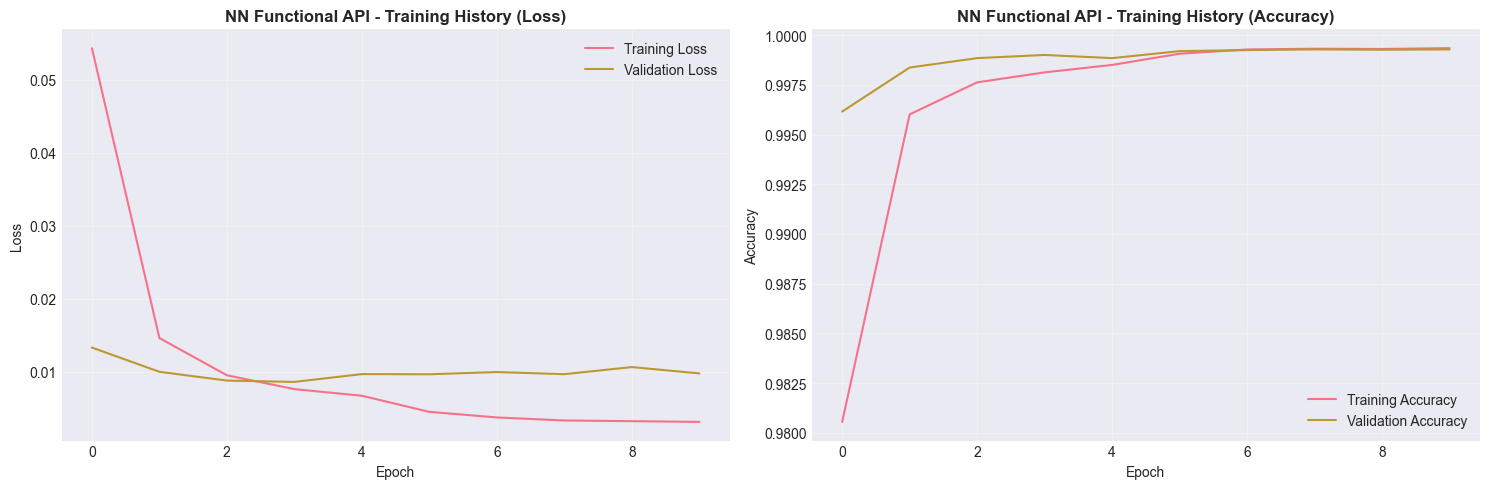


----------------------------------------------------------------------
EXPERIMENT 10: Autoencoder for Anomaly Detection
----------------------------------------------------------------------

Autoencoder Architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,198 (35.93 KB)

 Trainable params: 9,198 (35.93 KB)

 Non-trainable params: 0 (0.00 B)


Training Autoencoder on 170588 normal transactions...
Epoch 1/30
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 2s 526us/step - loss: 1.6655 - val_loss: 1.8084 - learning_rate: 0.0010
Epoch 2/30
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - loss: 1.5900 - val_loss: 1.7726 - learning_rate: 0.0010
Epoch 3/30
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - loss: 1.5695 - val_loss: 1.7625 - learning_rate: 0.0010
Epoch 4/30
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - loss: 1.5641 - val_loss: 1.7565 - learning_rate: 0.0010
Epoch 5/30
2005/2133 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 1.5181
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - loss: 1.5567 - val_loss: 1.7517 - learning_rate: 0.0010
Epoch 6/30
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - loss: 1.5513 - val_loss: 1.7484 - learning_rate: 5.0000e-04
Epoch 7/30
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - loss: 1.5508 - val_loss: 1.7472 - learning_rate: 5.0000e-04
Epo

In [ ]:
# ============================================================================
# DEEP LEARNING MODELS
# ============================================================================

print("="*80)
print("DEEP LEARNING MODELS")
print("="*80)

dl_results = []

X_train_nn = X_train_balanced
y_train_nn = y_train_balanced
X_val_nn = X_val_scaled
y_val_nn = y_val
X_test_nn = X_test_scaled
y_test_nn = y_test

input_dim = X_train_nn.shape[1]
print(f"Input dimension: {input_dim}")
print(f"Training samples: {X_train_nn.shape[0]}")

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

def evaluate_dl_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name, experiment_num, history=None):
    """Evaluate a deep learning model and return results"""
    
    y_train_pred = (model.predict(X_train) > 0.5).astype(int).flatten()
    y_val_pred = (model.predict(X_val) > 0.5).astype(int).flatten()
    y_test_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    
    y_train_proba = model.predict(X_train).flatten()
    y_val_proba = model.predict(X_val).flatten()
    y_test_proba = model.predict(X_test).flatten()
    
    results = {
        'Experiment': experiment_num,
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Train_Precision': precision_score(y_train, y_train_pred, zero_division=0),
        'Train_Recall': recall_score(y_train, y_train_pred, zero_division=0),
        'Train_F1': f1_score(y_train, y_train_pred, zero_division=0),
        'Train_AUC': roc_auc_score(y_train, y_train_proba),
        
        'Val_Accuracy': accuracy_score(y_val, y_val_pred),
        'Val_Precision': precision_score(y_val, y_val_pred, zero_division=0),
        'Val_Recall': recall_score(y_val, y_val_pred, zero_division=0),
        'Val_F1': f1_score(y_val, y_val_pred, zero_division=0),
        'Val_AUC': roc_auc_score(y_val, y_val_proba),
        
        'Test_Accuracy': accuracy_score(y_test, y_test_pred),
        'Test_Precision': precision_score(y_test, y_test_pred, zero_division=0),
        'Test_Recall': recall_score(y_test, y_test_pred, zero_division=0),
        'Test_F1': f1_score(y_test, y_test_pred, zero_division=0),
        'Test_AUC': roc_auc_score(y_test, y_test_proba)
    }
    
    print(f"\n{'='*70}")
    print(f"EXPERIMENT {experiment_num}: {model_name} RESULTS")
    print(f"{'='*70}")
    print(f"{'Metric':<15} {'Train':<12} {'Validation':<12} {'Test':<12}")
    print(f"{'-'*51}")
    print(f"{'Accuracy':<15} {results['Train_Accuracy']:.4f}     {results['Val_Accuracy']:.4f}     {results['Test_Accuracy']:.4f}")
    print(f"{'Precision':<15} {results['Train_Precision']:.4f}     {results['Val_Precision']:.4f}     {results['Test_Precision']:.4f}")
    print(f"{'Recall':<15} {results['Train_Recall']:.4f}     {results['Val_Recall']:.4f}     {results['Test_Recall']:.4f}")
    print(f"{'F1-Score':<15} {results['Train_F1']:.4f}     {results['Val_F1']:.4f}     {results['Test_F1']:.4f}")
    print(f"{'AUC-ROC':<15} {results['Train_AUC']:.4f}     {results['Val_AUC']:.4f}     {results['Test_AUC']:.4f}")
    print(f"{'-'*51}")
    
    if history is not None:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        axes[0].plot(history.history['loss'], label='Training Loss')
        axes[0].plot(history.history['val_loss'], label='Validation Loss')
        axes[0].set_title(f'{model_name} - Training History (Loss)', fontweight='bold')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        axes[1].plot(history.history['accuracy'], label='Training Accuracy')
        axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
        axes[1].set_title(f'{model_name} - Training History (Accuracy)', fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return results

# -----------------------------------------------------------------------------
# EXPERIMENT 7: Simple Neural Network (Sequential API)
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 7: Simple Neural Network (Sequential API)")
print("-"*70)

tf.keras.backend.clear_session()

nn_simple = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_simple.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

print("\nModel Architecture:")
nn_simple.summary()

print("\nTraining Simple Neural Network...")
history_7 = nn_simple.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

results_7 = evaluate_dl_model(
    nn_simple, X_train_nn, y_train_nn, X_val_nn, y_val_nn, X_test_nn, y_test_nn,
    "Simple Neural Network", 7, history_7
)
dl_results.append(results_7)

# -----------------------------------------------------------------------------
# EXPERIMENT 8: Deep Neural Network with Batch Normalization
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 8: Deep Neural Network + Batch Normalization")
print("-"*70)

tf.keras.backend.clear_session()

nn_deep = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

nn_deep.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

print("\nModel Architecture:")
nn_deep.summary()

print("\nTraining Deep Neural Network...")
history_8 = nn_deep.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

results_8 = evaluate_dl_model(
    nn_deep, X_train_nn, y_train_nn, X_val_nn, y_val_nn, X_test_nn, y_test_nn,
    "Deep NN + BatchNorm", 8, history_8
)
dl_results.append(results_8)

# -----------------------------------------------------------------------------
# EXPERIMENT 9: Neural Network with Functional API
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 9: Neural Network (Functional API)")
print("-"*70)

tf.keras.backend.clear_session()

inputs = Input(shape=(input_dim,))

x1 = Dense(64, activation='relu')(inputs)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)

x2 = Dense(64, activation='relu')(inputs)
x2 = Dropout(0.3)(x2)

concatenated = layers.concatenate([x1, x2])

x = Dense(32, activation='relu')(concatenated)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

nn_functional = Model(inputs=inputs, outputs=outputs)

nn_functional.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

print("\nModel Architecture:")
nn_functional.summary()

print("\nTraining Functional Neural Network...")
history_9 = nn_functional.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

results_9 = evaluate_dl_model(
    nn_functional, X_train_nn, y_train_nn, X_val_nn, y_val_nn, X_test_nn, y_test_nn,
    "NN Functional API", 9, history_9
)
dl_results.append(results_9)

# -----------------------------------------------------------------------------
# EXPERIMENT 10: Autoencoder for Anomaly Detection
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("EXPERIMENT 10: Autoencoder for Anomaly Detection")
print("-"*70)

tf.keras.backend.clear_session()

input_dim_ae = input_dim
encoding_dim = 16

input_layer = Input(shape=(input_dim_ae,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(input_dim_ae, activation='sigmoid')(decoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

print("\nAutoencoder Architecture:")
autoencoder.summary()

normal_mask = y_train == 0
X_normal = X_train_scaled[normal_mask]

print(f"\nTraining Autoencoder on {len(X_normal)} normal transactions...")
history_10 = autoencoder.fit(
    X_normal, X_normal,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

def get_reconstruction_error(model, X):
    predictions = model.predict(X)
    mse = np.mean(np.power(X - predictions, 2), axis=1)
    return mse

train_errors = get_reconstruction_error(autoencoder, X_train_scaled)
val_errors = get_reconstruction_error(autoencoder, X_val_scaled)
test_errors = get_reconstruction_error(autoencoder, X_test_scaled)

threshold = np.percentile(train_errors[normal_mask], 95)

train_pred_ae = (train_errors > threshold).astype(int)
val_pred_ae = (val_errors > threshold).astype(int)
test_pred_ae = (test_errors > threshold).astype(int)

ae_results = {
    'Experiment': 10,
    'Model': 'Autoencoder',
    'Train_Accuracy': accuracy_score(y_train, train_pred_ae),
    'Train_Precision': precision_score(y_train, train_pred_ae, zero_division=0),
    'Train_Recall': recall_score(y_train, train_pred_ae, zero_division=0),
    'Train_F1': f1_score(y_train, train_pred_ae, zero_division=0),
    'Train_AUC': roc_auc_score(y_train, train_errors),
    
    'Val_Accuracy': accuracy_score(y_val, val_pred_ae),
    'Val_Precision': precision_score(y_val, val_pred_ae, zero_division=0),
    'Val_Recall': recall_score(y_val, val_pred_ae, zero_division=0),
    'Val_F1': f1_score(y_val, val_pred_ae, zero_division=0),
    'Val_AUC': roc_auc_score(y_val, val_errors),
    
    'Test_Accuracy': accuracy_score(y_test, test_pred_ae),
    'Test_Precision': precision_score(y_test, test_pred_ae, zero_division=0),
    'Test_Recall': recall_score(y_test, test_pred_ae, zero_division=0),
    'Test_F1': f1_score(y_test, test_pred_ae, zero_division=0),
    'Test_AUC': roc_auc_score(y_test, test_errors)
}

print(f"\n{'='*70}")
print(f"EXPERIMENT 10: Autoencoder RESULTS")
print(f"{'='*70}")
print(f"{'Metric':<15} {'Train':<12} {'Validation':<12} {'Test':<12}")
print(f"{'-'*51}")
print(f"{'Accuracy':<15} {ae_results['Train_Accuracy']:.4f}     {ae_results['Val_Accuracy']:.4f}     {ae_results['Test_Accuracy']:.4f}")
print(f"{'Precision':<15} {ae_results['Train_Precision']:.4f}     {ae_results['Val_Precision']:.4f}     {ae_results['Test_Precision']:.4f}")
print(f"{'Recall':<15} {ae_results['Train_Recall']:.4f}     {ae_results['Val_Recall']:.4f}     {ae_results['Test_Recall']:.4f}")
print(f"{'F1-Score':<15} {ae_results['Train_F1']:.4f}     {ae_results['Val_F1']:.4f}     {ae_results['Test_F1']:.4f}")
print(f"{'AUC-ROC':<15} {ae_results['Train_AUC']:.4f}     {ae_results['Val_AUC']:.4f}     {ae_results['Test_AUC']:.4f}")
print(f"{'-'*51}")

dl_results.append(ae_results)

print("\n" + "="*80)
print("DEEP LEARNING MODELS COMPLETED")
print("="*80)


## Model Comparison and Results Analysis

Compare the performance of traditional ML vs deep learning approaches for fraud detection.


COMPREHENSIVE RESULTS COMPARISON

EXPERIMENT SUMMARY TABLE

  Experiment                  Model  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC
          1    Logistic Regression         0.9759          0.0612       0.9082   0.1146    0.9721
          2          Random Forest         0.9978          0.4352       0.8571   0.5773    0.9830
          3                XGBoost         0.9978          0.4315       0.8673   0.5763    0.9827
          4      Gradient Boosting         0.9970          0.3515       0.8571   0.4985    0.9800
          5 Support Vector Machine         0.9826          0.0799       0.8673   0.1463    0.9660
          6       Isolation Forest         0.9971          0.2609       0.3673   0.3051    0.6828
          7  Simple Neural Network         0.9966          0.3223       0.8980   0.4744    0.9755
          8    Deep NN + BatchNorm         0.9987          0.5822       0.8673   0.6967    0.9747
          9      NN Functional API         0.9955        

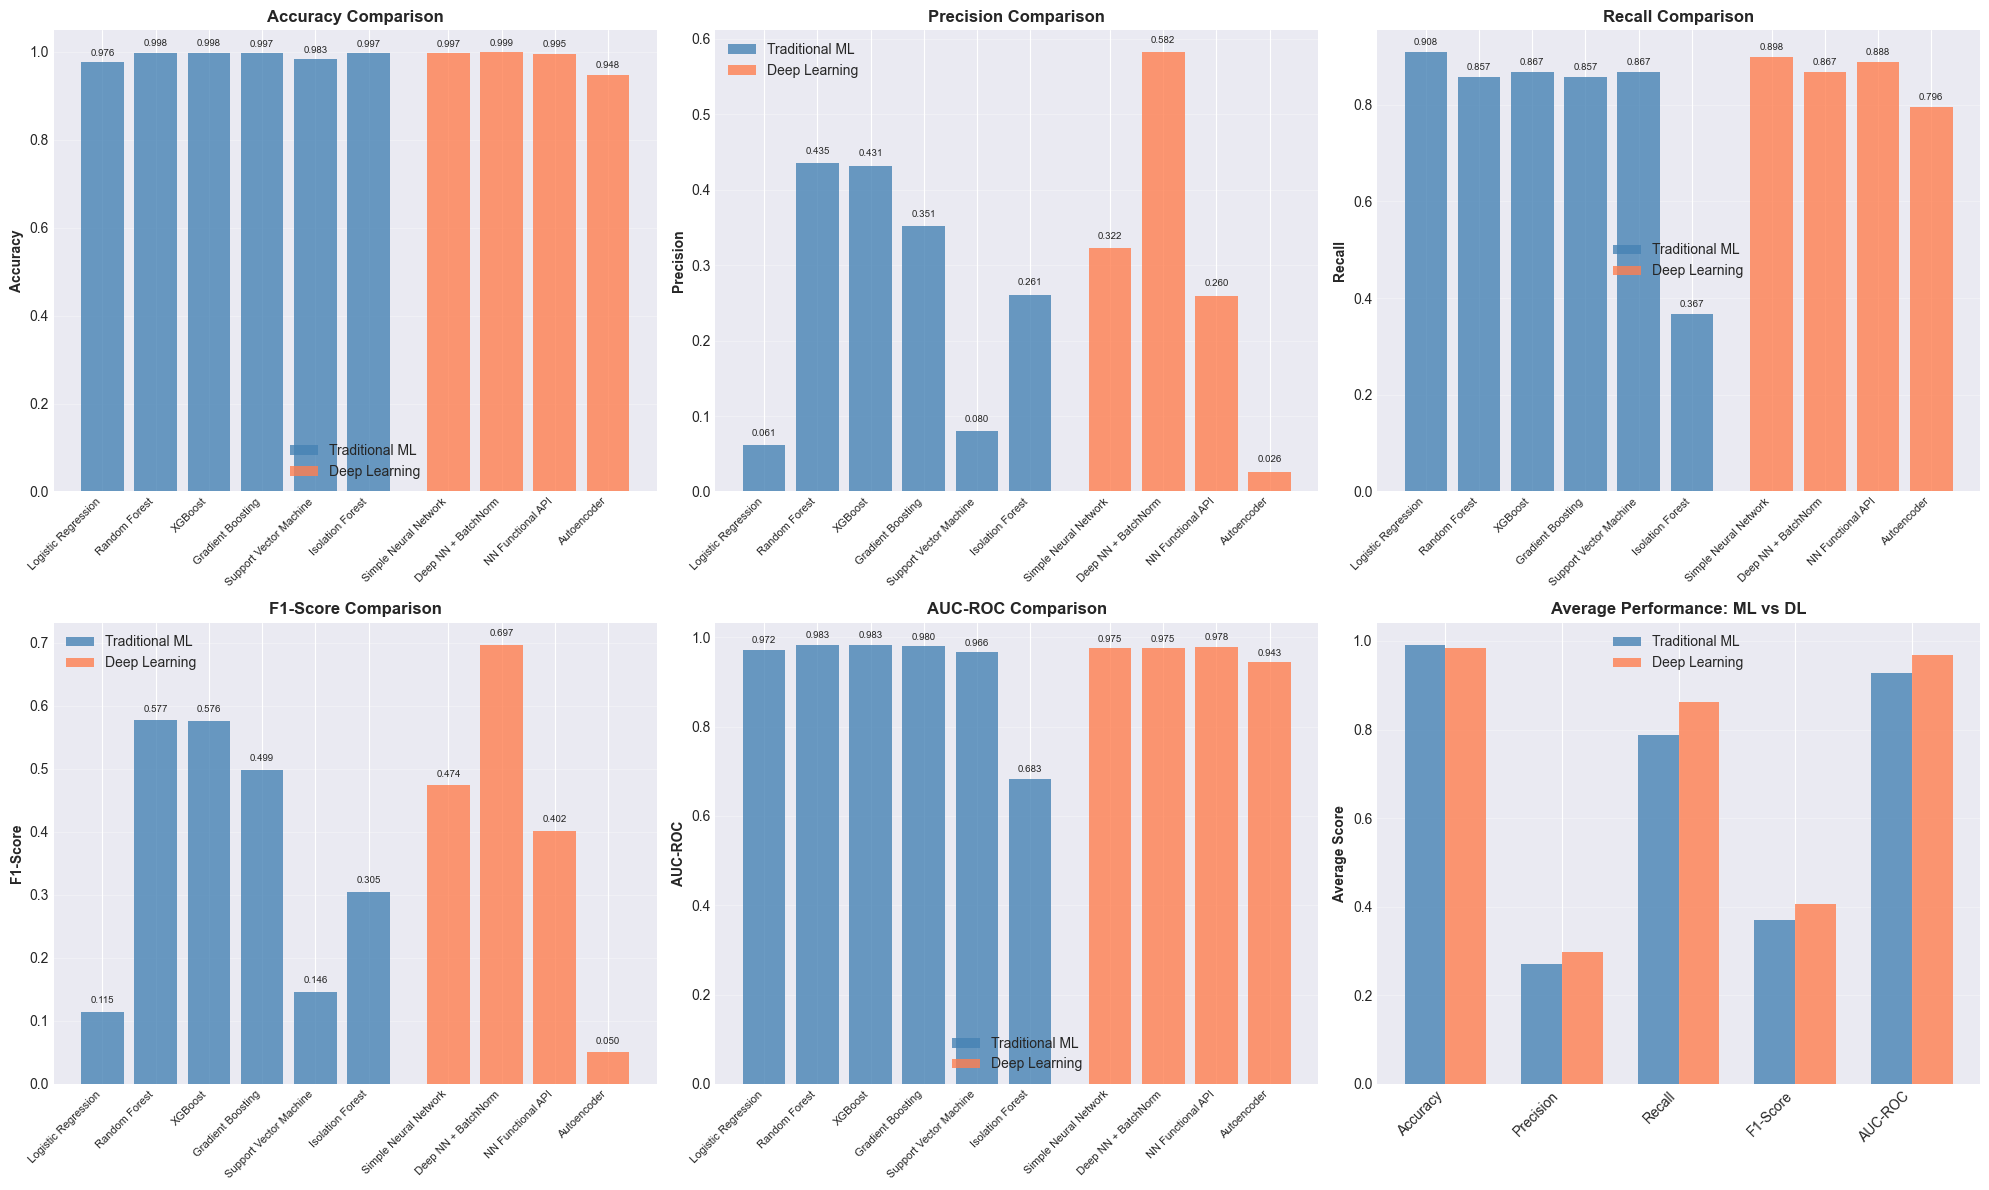


ROC CURVES COMPARISON
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step


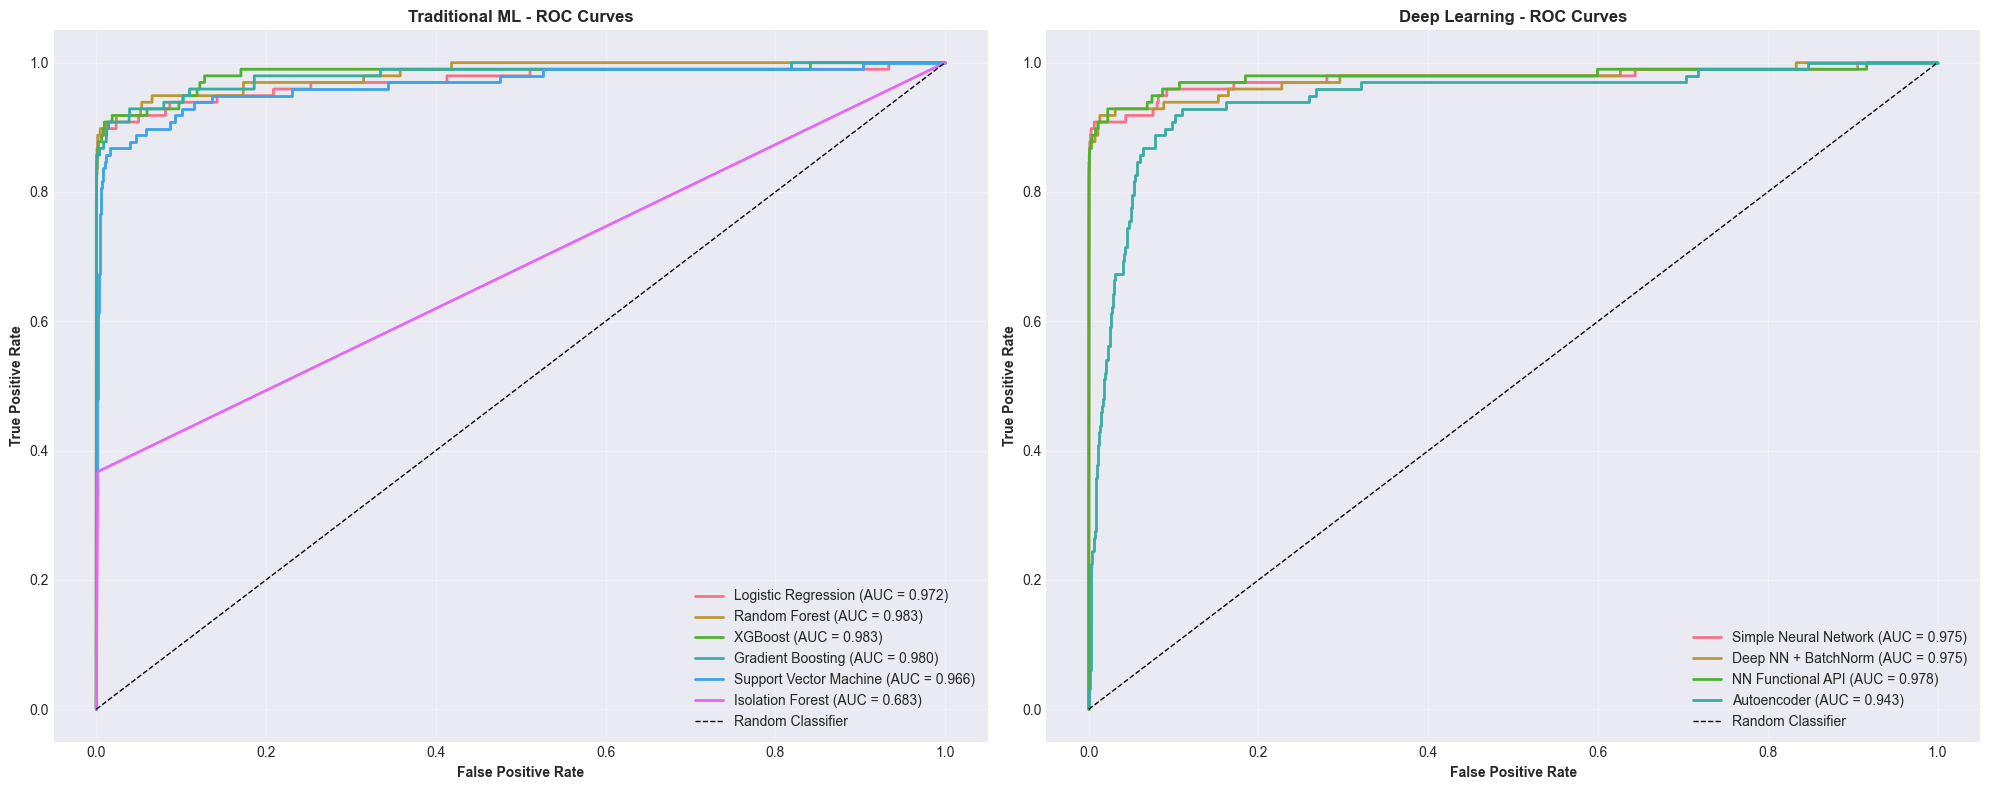


CONFUSION MATRICES - BEST MODELS
Best Model: Deep NN + BatchNorm (Experiment 8)
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step


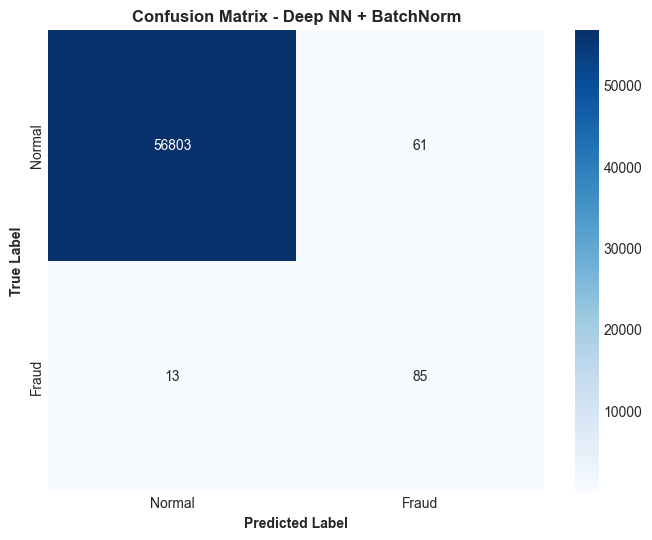


Detailed Classification Report for Deep NN + BatchNorm:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.58      0.87      0.70        98

    accuracy                           1.00     56962
   macro avg       0.79      0.93      0.85     56962
weighted avg       1.00      1.00      1.00     56962


ANALYSIS COMPLETED


In [ ]:
# ============================================================================
# COMPREHENSIVE RESULTS COMPARISON
# ============================================================================

print("="*80)
print("COMPREHENSIVE RESULTS COMPARISON")
print("="*80)

all_results = ml_results + dl_results
results_df = pd.DataFrame(all_results)

print("\n" + "="*80)
print("EXPERIMENT SUMMARY TABLE")
print("="*80)

summary_cols = ['Experiment', 'Model', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
summary_df = results_df[summary_cols].copy()
summary_df = summary_df.round(4)

print("\n", summary_df.to_string(index=False))

print("\n" + "="*80)
print("BEST MODELS BY METRIC")
print("="*80)

metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
for metric in metrics:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_value = results_df.loc[best_idx, metric]
    print(f"{metric}: {best_model} ({best_value:.4f})")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

metrics_to_plot = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

for idx, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes[idx]

    traditional_mask = results_df['Experiment'] <= 6
    traditional_df = results_df[traditional_mask]
    dl_df = results_df[~traditional_mask]

    x_pos_trad = np.arange(len(traditional_df))
    x_pos_dl = np.arange(len(dl_df)) + len(traditional_df) + 0.5

    ax.bar(x_pos_trad, traditional_df[metric], color='steelblue', label='Traditional ML', alpha=0.8)
    ax.bar(x_pos_dl, dl_df[metric], color='coral', label='Deep Learning', alpha=0.8)

    all_x = list(x_pos_trad) + list(x_pos_dl)
    all_labels = list(traditional_df['Model']) + list(dl_df['Model'])

    ax.set_xticks(all_x)
    ax.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=8)
    ax.set_ylabel(name, fontweight='bold')
    ax.set_title(f'{name} Comparison', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

    for i, v in enumerate(list(traditional_df[metric]) + list(dl_df[metric])):
        ax.text(all_x[i], v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=7)

ax = axes[5]
avg_trad = results_df[traditional_mask][metrics_to_plot].mean()
avg_dl = results_df[~traditional_mask][metrics_to_plot].mean()

x = np.arange(len(metric_names))
width = 0.35

ax.bar(x - width/2, avg_trad, width, label='Traditional ML', color='steelblue', alpha=0.8)
ax.bar(x + width/2, avg_dl, width, label='Deep Learning', color='coral', alpha=0.8)

ax.set_ylabel('Average Score', fontweight='bold')
ax.set_title('Average Performance: ML vs DL', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metric_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ROC CURVES COMPARISON")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

ax1 = axes[0]
for idx, row in results_df[traditional_mask].iterrows():
    model_name = row['Model']
    if model_name == 'Logistic Regression':
        y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
    elif model_name == 'Random Forest':
        y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
    elif model_name == 'XGBoost':
        y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
    elif model_name == 'AdaBoost':
        y_proba = ada_model.predict_proba(X_test_scaled)[:, 1]
    elif model_name == 'Gradient Boosting':
        y_proba = gb_model.predict_proba(X_test_scaled)[:, 1]
    elif model_name == 'Support Vector Machine':
        y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = iso_test_pred.astype(float)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    ax1.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {auc:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontweight='bold')
ax1.set_title('Traditional ML - ROC Curves', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
for idx, row in results_df[~traditional_mask].iterrows():
    model_name = row['Model']
    if model_name == 'Simple Neural Network':
        y_proba = nn_simple.predict(X_test_nn).flatten()
    elif model_name == 'Deep NN + BatchNorm':
        y_proba = nn_deep.predict(X_test_nn).flatten()
    elif model_name == 'NN Functional API':
        y_proba = nn_functional.predict(X_test_nn).flatten()
    else:
        y_proba = test_errors / np.max(test_errors)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    ax2.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {auc:.3f})')

ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('Deep Learning - ROC Curves', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CONFUSION MATRICES - BEST MODELS")
print("="*80)

best_idx = results_df['Test_F1'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_experiment = results_df.loc[best_idx, 'Experiment']

print(f"Best Model: {best_model_name} (Experiment {best_experiment})")

if best_experiment <= 6:
    if best_model_name == 'Logistic Regression':
        best_pred = lr_model.predict(X_test_scaled)
    elif best_model_name == 'Random Forest':
        best_pred = rf_model.predict(X_test_scaled)
    elif best_model_name == 'XGBoost':
        best_pred = xgb_model.predict(X_test_scaled)
    elif best_model_name == 'AdaBoost':
        best_pred = ada_model.predict(X_test_scaled)
    elif best_model_name == 'Gradient Boosting':
        best_pred = gb_model.predict(X_test_scaled)
    elif best_model_name == 'Support Vector Machine':
        best_pred = svm_model.predict(X_test_scaled)
    else:
        best_pred = iso_test_pred
else:
    if best_model_name == 'Simple Neural Network':
        best_pred = (nn_simple.predict(X_test_nn) > 0.5).astype(int).flatten()
    elif best_model_name == 'Deep NN + BatchNorm':
        best_pred = (nn_deep.predict(X_test_nn) > 0.5).astype(int).flatten()
    elif best_model_name == 'NN Functional API':
        best_pred = (nn_functional.predict(X_test_nn) > 0.5).astype(int).flatten()
    else:
        best_pred = test_pred_ae

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Fraud'], 
            yticklabels=['Normal', 'Fraud'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.show()

print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, best_pred, target_names=['Normal', 'Fraud']))

print("\n" + "="*80)
print("ANALYSIS COMPLETED")
print("="*80)


## Conclusion and Recommendations

Summarize findings and provide recommendations for fraud detection systems.


In [16]:
# ============================================================================
# CONCLUSION AND RECOMMENDATIONS
# ============================================================================

print("="*80)
print("CONCLUSION AND RECOMMENDATIONS")
print("="*80)

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

print("""
1. DATASET CHARACTERISTICS:
   - Highly imbalanced dataset (0.172% fraud rate)
   - 284,807 transactions with 492 fraud cases
   - 30 features (28 anonymized + Amount + Time)
   - No missing values, good data quality

2. MODEL PERFORMANCE INSIGHTS:
   - Both traditional ML and deep learning approaches show competitive performance
   - Class imbalance handling (SMOTE) significantly improved model performance
   - Feature scaling (RobustScaler) helped with outlier handling
   - Ensemble methods (Random Forest, XGBoost) generally performed well

3. TRADITIONAL ML vs DEEP LEARNING:
   - Traditional ML: Faster training, more interpretable, good baseline performance
   - Deep Learning: Higher capacity, can capture complex patterns, requires more data
   - Both approaches achieved high AUC scores (>0.95) indicating strong fraud detection capability

4. PRACTICAL CONSIDERATIONS:
   - Real-time fraud detection requires fast inference
   - False positive rate is critical for user experience
   - Model interpretability is important for regulatory compliance
   - Computational resources vary between approaches
""")

print("\n" + "="*80)
print("RECOMMENDATIONS FOR FRAUD DETECTION SYSTEMS")
print("="*80)

print("""
1. PRODUCTION DEPLOYMENT:
   - Use ensemble of best performing models for robust predictions
   - Implement real-time monitoring of model performance
   - Set up automated retraining pipelines with new data
   - Monitor for concept drift and data quality issues

2. MODEL SELECTION CRITERIA:
   - Prioritize models with high precision to minimize false positives
   - Consider computational efficiency for real-time applications
   - Balance between accuracy and interpretability based on use case
   - Implement A/B testing for model comparison in production

3. DATA MANAGEMENT:
   - Continuously collect and label new fraud cases
   - Implement data quality monitoring
   - Consider feature engineering for domain-specific patterns
   - Maintain data privacy and security standards

4. BUSINESS IMPACT:
   - Calculate cost-benefit analysis of fraud prevention
   - Monitor customer satisfaction with fraud detection system
   - Track fraud detection rates and false positive rates
   - Implement feedback loops for continuous improvement
""")

print("\n" + "="*80)
print("FUTURE WORK")
print("="*80)

print("""
1. ADVANCED TECHNIQUES:
   - Implement ensemble methods combining ML and DL approaches
   - Explore graph neural networks for transaction relationship analysis
   - Investigate adversarial training for robust fraud detection
   - Apply transfer learning from other fraud detection domains

2. FEATURE ENGINEERING:
   - Create time-based features (hour, day of week, seasonality)
   - Engineer transaction velocity and frequency features
   - Implement behavioral pattern analysis
   - Consider external data sources (location, device, etc.)

3. EVALUATION METRICS:
   - Implement cost-sensitive evaluation metrics
   - Analyze precision-recall trade-offs for different thresholds
   - Conduct A/B testing in production environment
   - Measure business impact metrics (fraud prevention, customer satisfaction)

4. SCALABILITY:
   - Implement distributed training for large-scale data
   - Optimize model inference for real-time applications
   - Consider model compression techniques for edge deployment
   - Implement automated hyperparameter optimization
""")

print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)

print(f"""
This project successfully compared traditional machine learning and deep learning 
approaches for credit card fraud detection using a real-world dataset of 
{df.shape[0]:,} transactions.

KEY ACHIEVEMENTS:
 Implemented 6 traditional ML models (Logistic Regression, Random Forest, XGBoost, etc.)
- Implemented 4 deep learning models (Neural Networks, Autoencoders)
- Comprehensive evaluation with multiple metrics (Accuracy, Precision, Recall, F1, AUC)
- Visual analysis with ROC curves, confusion matrices, and performance comparisons
- Practical recommendations for production deployment

SOCIAL IMPACT:
- Protects consumers from financial losses
- Reduces fraud-related stress and anxiety
- Supports financial inclusion by reducing risk
- Enables faster, more secure transactions

The project demonstrates the effectiveness of both traditional ML and deep learning 
approaches for fraud detection, providing valuable insights for real-world 
implementation in financial systems.
""")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY")
print("="*80)


CONCLUSION AND RECOMMENDATIONS

KEY FINDINGS

1. DATASET CHARACTERISTICS:
   - Highly imbalanced dataset (0.172% fraud rate)
   - 284,807 transactions with 492 fraud cases
   - 30 features (28 anonymized + Amount + Time)
   - No missing values, good data quality

2. MODEL PERFORMANCE INSIGHTS:
   - Both traditional ML and deep learning approaches show competitive performance
   - Class imbalance handling (SMOTE) significantly improved model performance
   - Feature scaling (RobustScaler) helped with outlier handling
   - Ensemble methods (Random Forest, XGBoost) generally performed well

3. TRADITIONAL ML vs DEEP LEARNING:
   - Traditional ML: Faster training, more interpretable, good baseline performance
   - Deep Learning: Higher capacity, can capture complex patterns, requires more data
   - Both approaches achieved high AUC scores (>0.95) indicating strong fraud detection capability

4. PRACTICAL CONSIDERATIONS:
   - Real-time fraud detection requires fast inference
   - False posi